<a href="https://colab.research.google.com/github/nafiul-araf/Customer-Churn-End-to-End-EDA-and-Hypothesis-Test/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Loading**



*   Mount the google drive
*   Import necessary libraries and set the visuals
*   Load the data using Pandas



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set Seaborn theme for a modern look
sns.set_theme(style="darkgrid", palette="coolwarm")

# Customize figure and font settings
plt.rcParams["figure.figsize"] = (15, 6)
font = {'family': 'serif', 'weight': 'bold', 'size': 14}
mpl.rc('font', **font)

# Set custom background and other plot aesthetics
plt.rcParams["axes.facecolor"] = "#F3F4F6"
plt.rcParams["axes.edgecolor"] = "#333333"
plt.rcParams["xtick.color"] = "#333333"
plt.rcParams["ytick.color"] = "#333333"
plt.rcParams["grid.color"] = "#D3D3D3"

# Seed for reproducibility
np.random.seed(42)

# Suppress warnings for a cleaner output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Analysis Projects/Project 4/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# **Exploratory Data Analysis (EDA)**

## **Step A: Data Checking and Cleaning**

### **Check the data types of the columns**

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


- **TotalCharges** should be numeric, but it’s currently an object.
- **SenionCitizen** should be categorical column.

In [ ]:
df['OnlineBackup']

,OnlineBackup
0,Yes
1,No
2,Yes
3,No
4,No
...,...
7038,No
7039,Yes
7040,No
7041,No


It was only the column that does not visible on the `df.head()`, The data type is ok.

### **Convert `SeniorCitizen` data type to category.**

In [ ]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('category')
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,category
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


### **Convert `TotalCharges` data type to numeric.**

In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,category
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


### **Check for missing values**

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Replace the missing values of **TotalCharges** with the **median** value.

In [ ]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### **Check for duplicates: italicized text Ensure each `customerID` is unique.**

In [ ]:
df.duplicated().sum()

0

### **Identify any outliers in numeric columns like `tenure`, `MonthlyCharges`, and `TotalCharges`.**

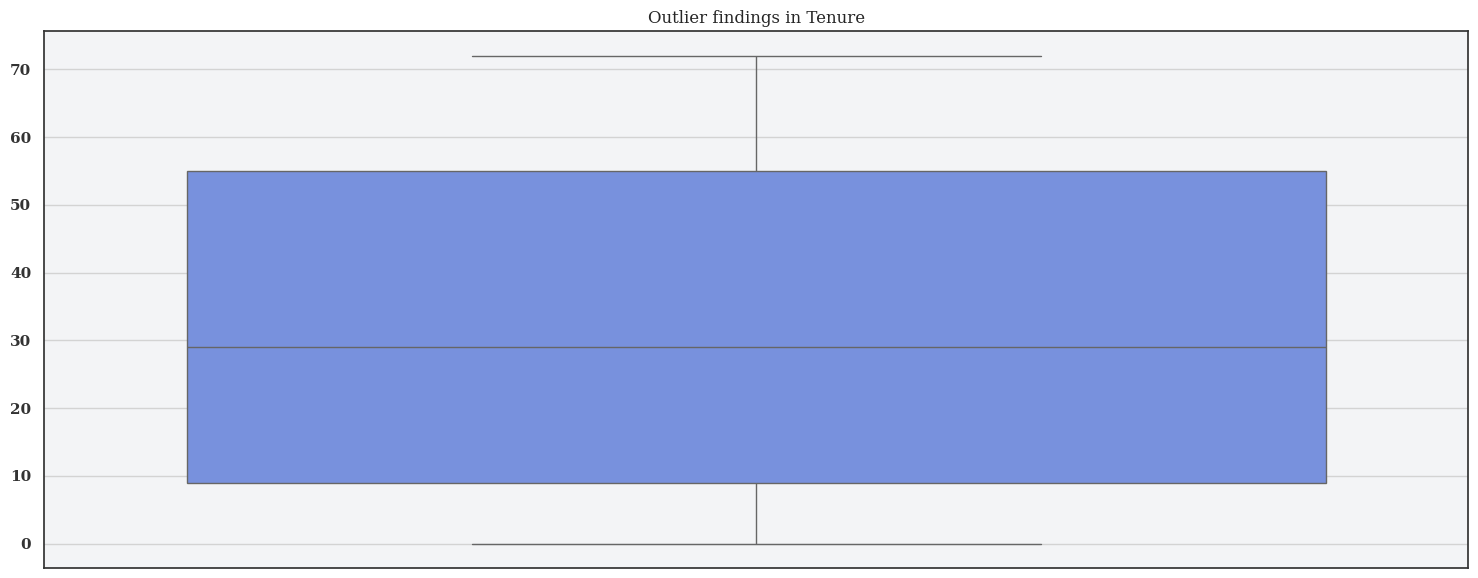

In [ ]:
sns.boxplot(data=df, y='tenure')
plt.title("Outlier findings in Tenure")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Inference from the Box Plot:** Outlier Findings in Tenure

The box plot represents the distribution of tenure data, with a median value close to the middle of the interquartile range (IQR).

- **Range**: The tenure ranges from approximately 0 to 70.
- **Median**: The median is around 30, suggesting that half of the values lie below and half above this point.
- **IQR (Interquartile Range)**: The IQR, represented by the height of the box, captures the middle 50% of tenure values, approximately between 9 and 55.
- **Outliers**: There are no visible outliers in this plot, as there are no data points beyond the "whiskers" (the lines extending from the box), which indicate the range of the non-outlier data.

This distribution suggests that tenure values are relatively concentrated within the IQR without extreme values that could be considered outliers. It indicates a fairly consistent spread in tenure among individuals in this dataset.

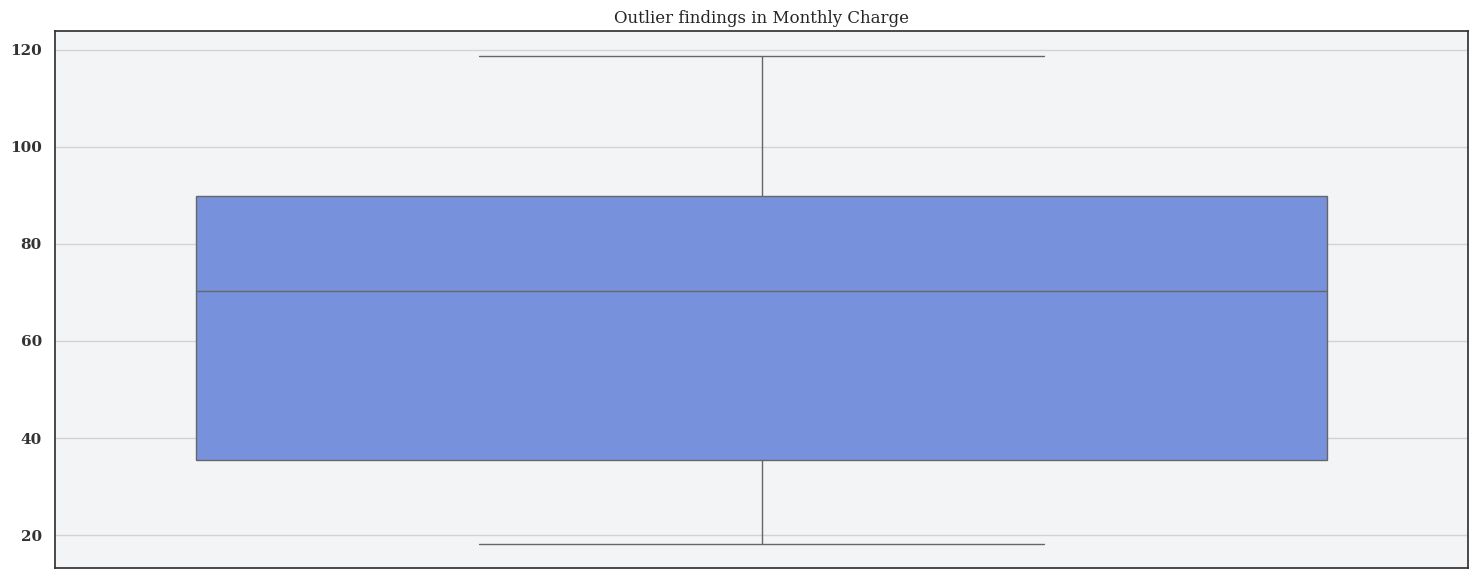

In [ ]:
sns.boxplot(data=df, y='MonthlyCharges')
plt.title("Outlier findings in Monthly Charge")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Inference from the Box Plot:** Outlier Findings in Monthly Charge

The box plot visualizes the distribution of monthly charge data, providing insights into central tendency, spread, and potential outliers.

- **Range**: The monthly charge values range from approximately 20 to 120.
- **Median**: The median monthly charge appears around 70, suggesting that half of the values lie below and half above this point.
- **IQR (Interquartile Range)**: The IQR, represented by the height of the box, spans roughly between 40 and 90, capturing the middle 50% of the monthly charge values.
- **Outliers**: Similar to the previous plot, there are no visible outliers in this box plot, as there are no points outside the "whiskers."

This distribution indicates a relatively consistent spread of monthly charges within the IQR, with no extreme values that could be flagged as outliers.


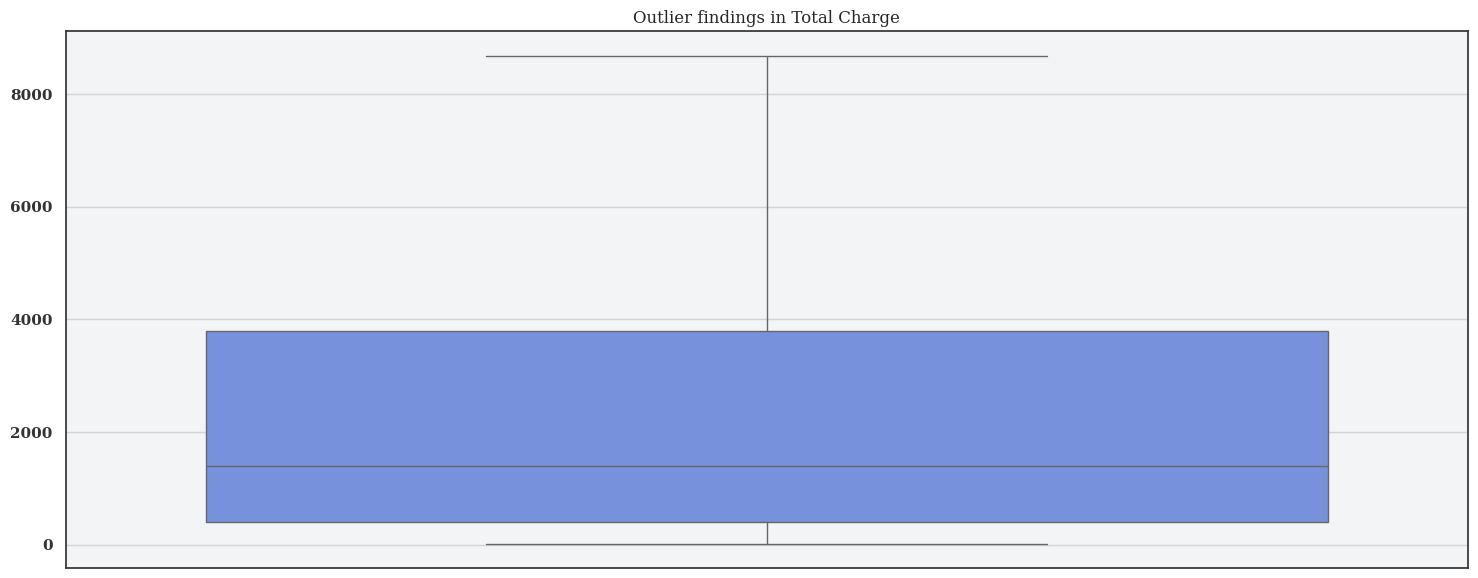

In [ ]:
sns.boxplot(data=df, y='TotalCharges')
plt.title("Outlier findings in Total Charge")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Inference from the Box Plot:** Outlier Findings in Total Charge

The box plot visualizes the distribution of total charge data, providing insights into central tendency, spread, and potential outliers.

- **Range**: The monthly charge values range from approximately 0 to 9000.
- **Median**: The median monthly charge appears around 1500, suggesting that half of the values lie below and half above this point.
- **IQR (Interquartile Range)**: The IQR, represented by the height of the box, spans roughly between 500 and 4000, capturing the middle 50% of the monthly charge values.
- **Outliers**: Similar to the previous plot, there are no visible outliers in this box plot, as there are no points outside the "whiskers."

This distribution indicates that the monthly charges are spread out within a moderate range, with values concentrated around the median and no extreme values outside the whiskers that would typically be flagged as outliers.


## **Step B: Initial Univariate Analysis**

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Plot the distribution of `Churn` to see the proportion of churned vs. non-churned customers.**

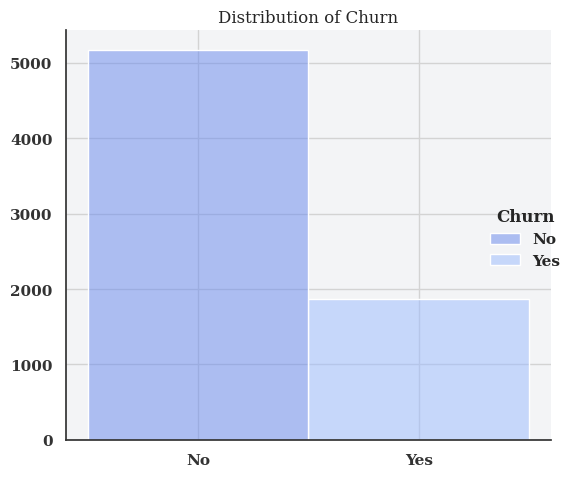

In [ ]:
sns.displot(data=df, x='Churn', hue='Churn')
plt.title("Distribution of Churn")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Insights from Distribution of Churn Status:**

There are more than 5,000 people who **retented**, while around 2,000 people **churned**.

### **Examine the distribution of categorical variables like `gender`, `Partner`, `Dependents`, `InternetService`, and `PaymentMethod`.**

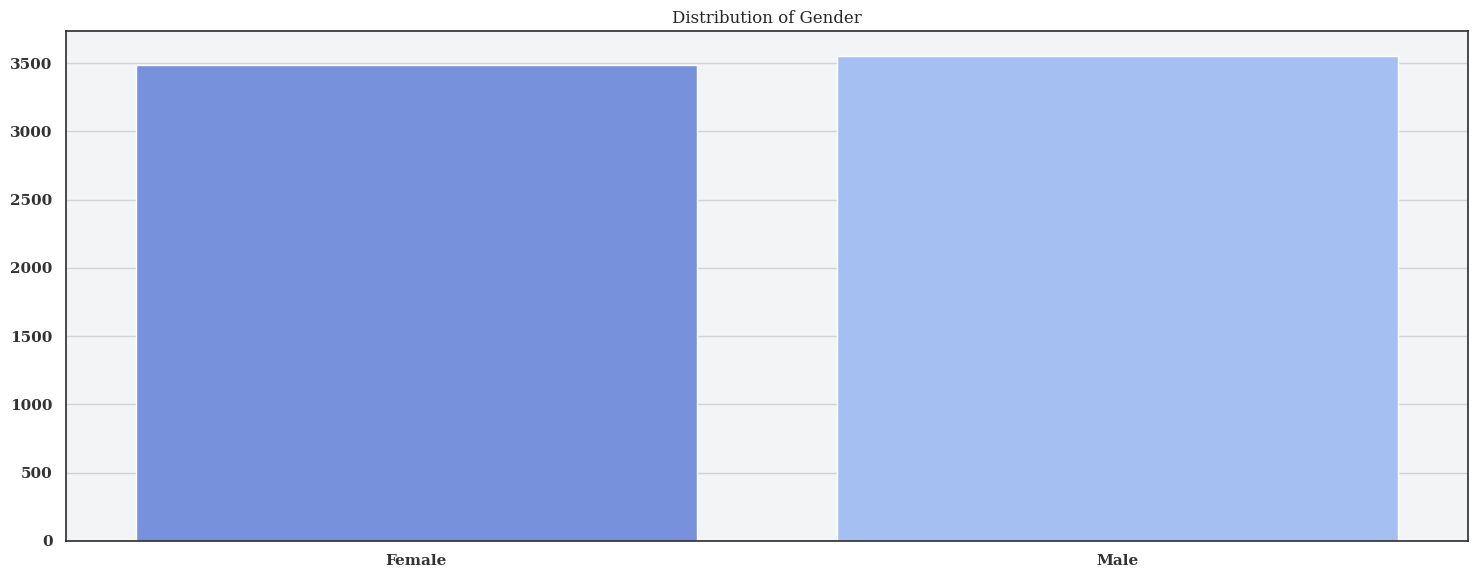

In [ ]:
sns.countplot(data=df, x='gender', hue='gender')
plt.title("Distribution of Gender")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Insights from Distribution of Gender:**

The gender distribution is almost identical with around 3500, where **male** customers are slightly more.

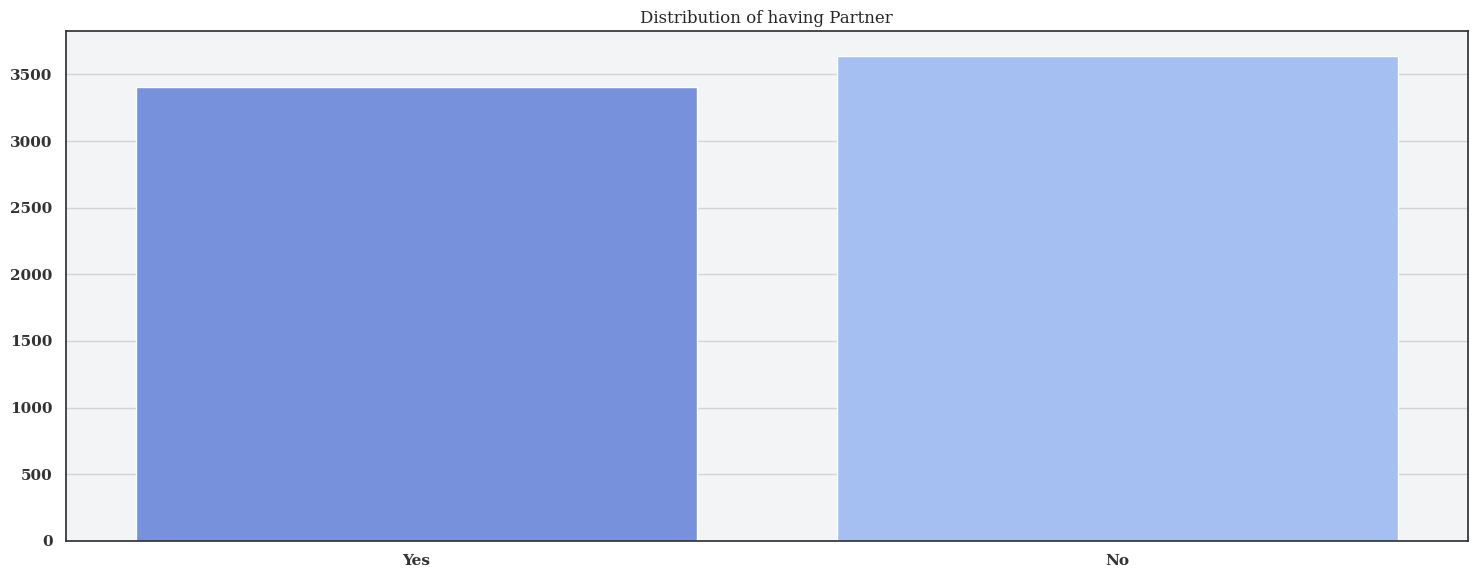

In [ ]:
sns.countplot(data=df, x='Partner', hue='Partner')
plt.title("Distribution of having Partner")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Insights from Distribution of Having Partner:**

There are more than 3,500 people who have no **partner**, while around 3,400 people have a **partner**. That means maximum peoples have no **partners**.

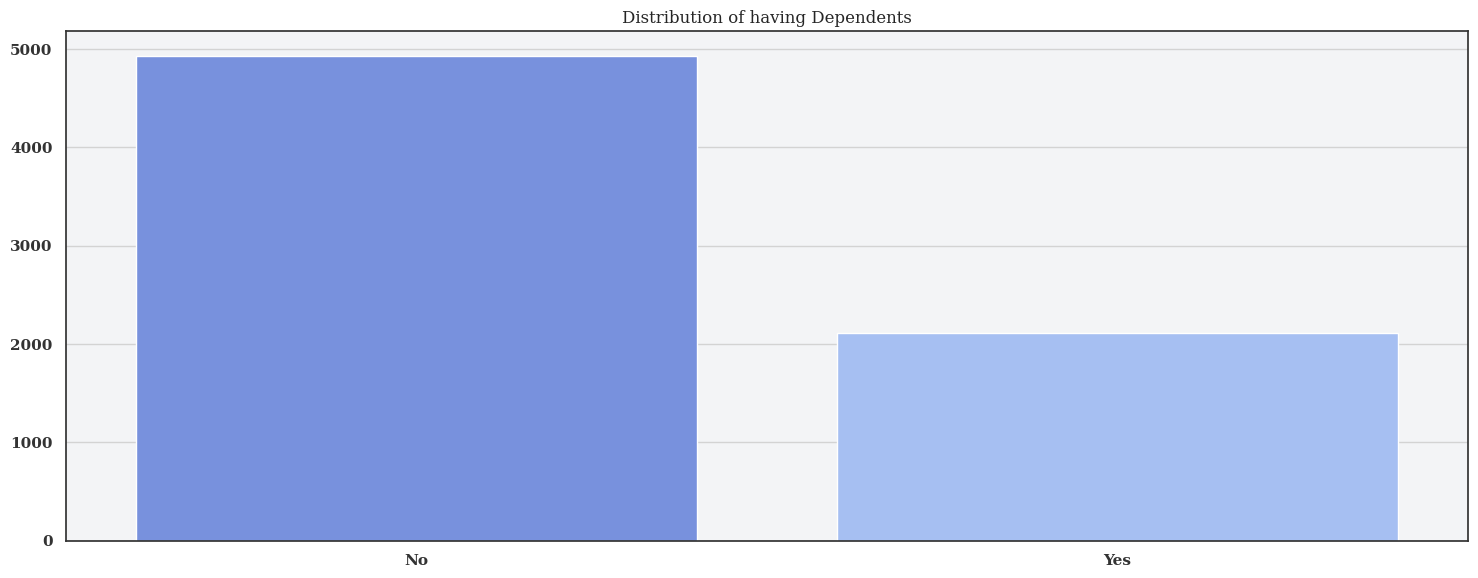

In [ ]:
sns.countplot(data=df, x='Dependents', hue='Dependents')
plt.title("Distribution of having Dependents")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Insights from Distribution of Having Dependents:**

There are around 5,000 people who have no **dependents**, while around 1,000 people have a **dependents**. That means maximum peoples have no **dependents**.

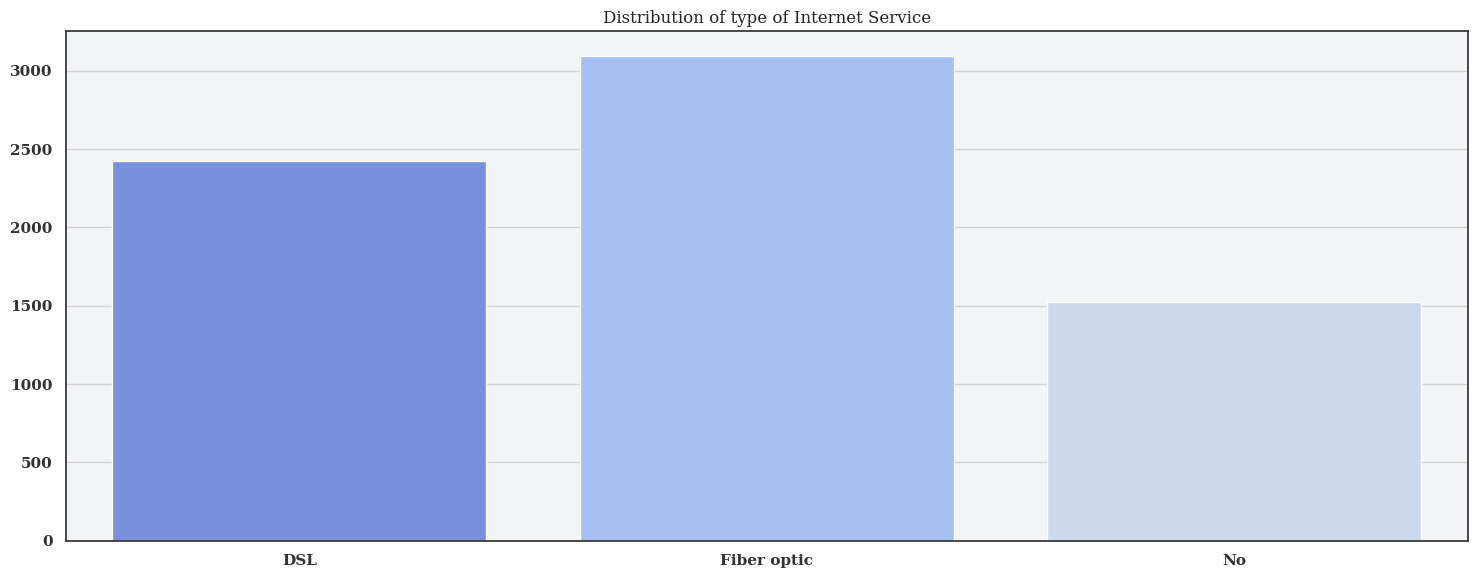

In [ ]:
sns.countplot(data=df, x='InternetService', hue='InternetService')
plt.title("Distribution of type of Internet Service")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Insights from Distribution of Type of Internet Services:**

There are around 3,000 people who use **fiber optics** as internet service, while around 3,500 people use **DSL**, and 1,500 people have **no** internet service. That means most people use **fiber-optic** cable.

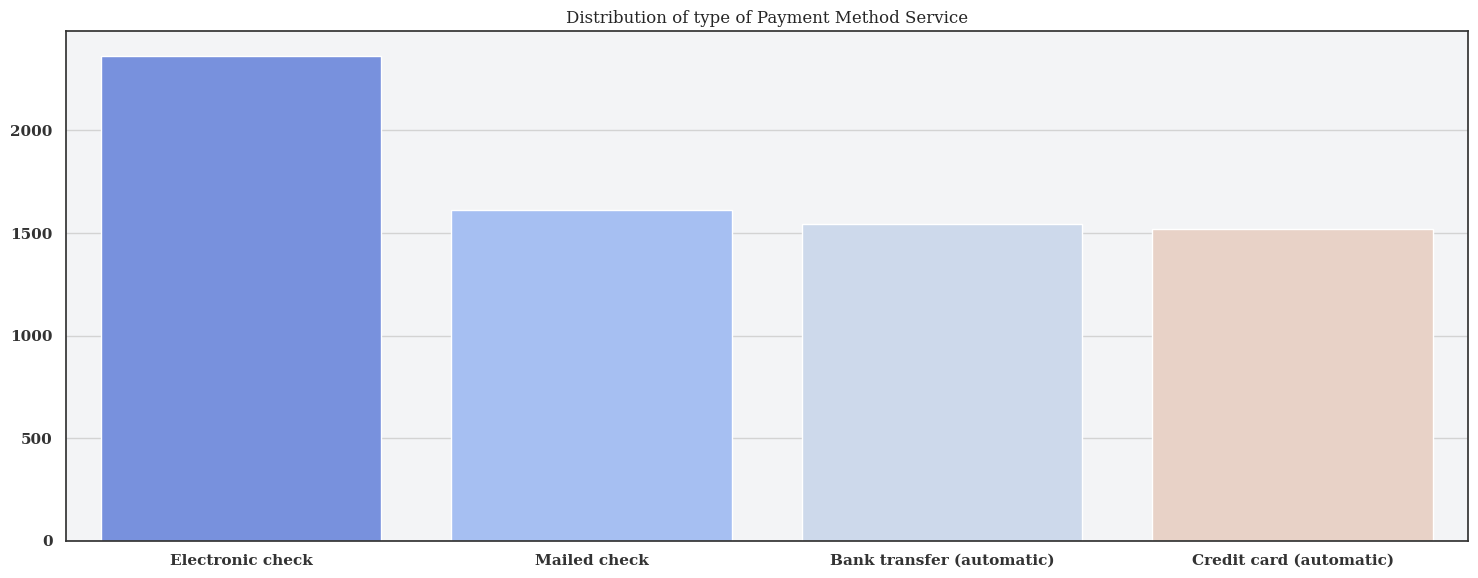

In [ ]:
sns.countplot(data=df, x='PaymentMethod', hue='PaymentMethod')
plt.title("Distribution of type of Payment Method Service")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Insights from Distribution of Type of Payment Method:**

There are around 2,500 people who use **electronic check** as payment method service, while the other three methods are used by almost identical numbers of people, ranging from roughly **1,500** to **1,600**. That means most people love **electronic checks** as payment method service.

### **Visualize distributions for `tenure`, `MonthlyCharges`, and `TotalCharges`.**

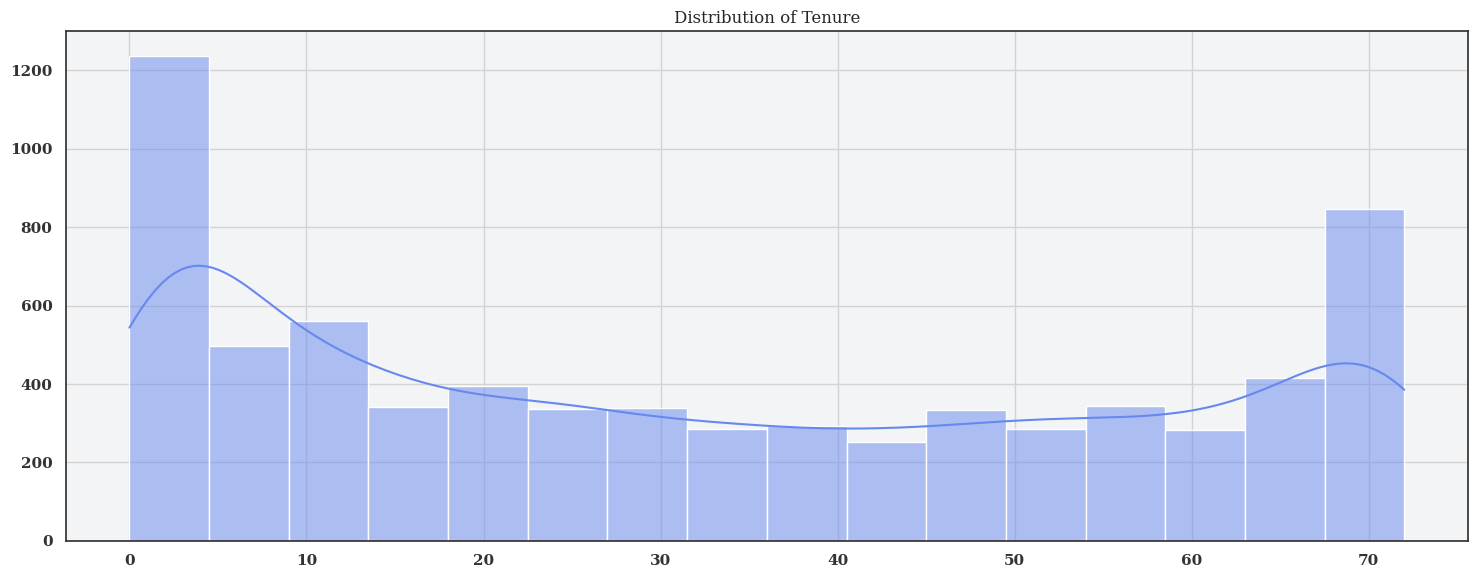

In [ ]:
sns.histplot(data=df, x='tenure', kde=True)
plt.title("Distribution of Tenure")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Inference on the Distribution of Tenure Chart:**

- **High Frequencies at Start and End**: Most employees have either very short tenure or very long tenure, suggesting high early turnover and a stable group of long-term employees.
- **Low Mid-Range Tenure**: Fewer employees have mid-range tenure, indicating potential turnover in these years.
- **Trend Line**: Shows a decrease after initial tenure, stable mid-range, and a slight rise toward long tenure.

This distribution could imply a need for retention strategies in the early years and succession planning for long-term employees.

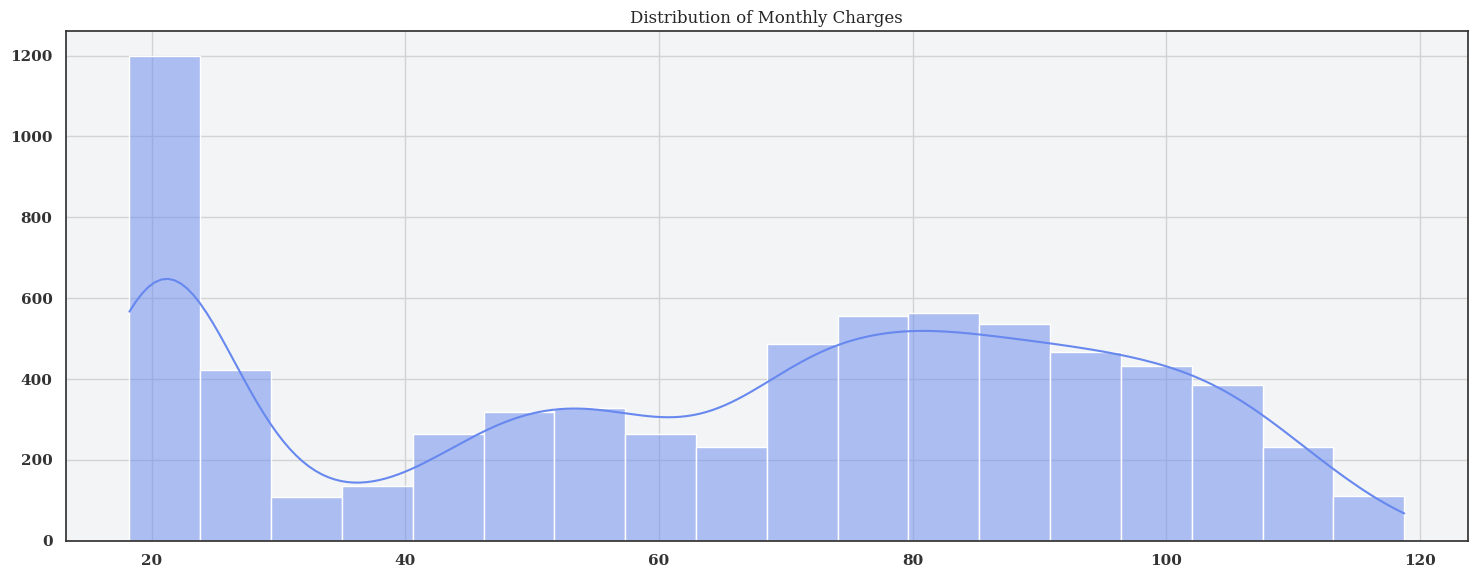

In [ ]:
sns.histplot(data=df, x='MonthlyCharges', kde=True)
plt.title("Distribution of Monthly Charges")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Inference on the Distribution of Monthly Charges Chart:**

- **High Frequency at Lower Charges**: Most customers are concentrated at lower monthly charges, indicating affordability is a key factor.
- **Increasing Frequency in Mid-Range**: The frequency rises again around the 50–80 range, showing another popular pricing tier.
- **Decline at Higher Charges**: Few customers are in the higher charge range (above 100), suggesting limited demand for higher-cost options.

This distribution suggests a potential preference for affordable or mid-range services.

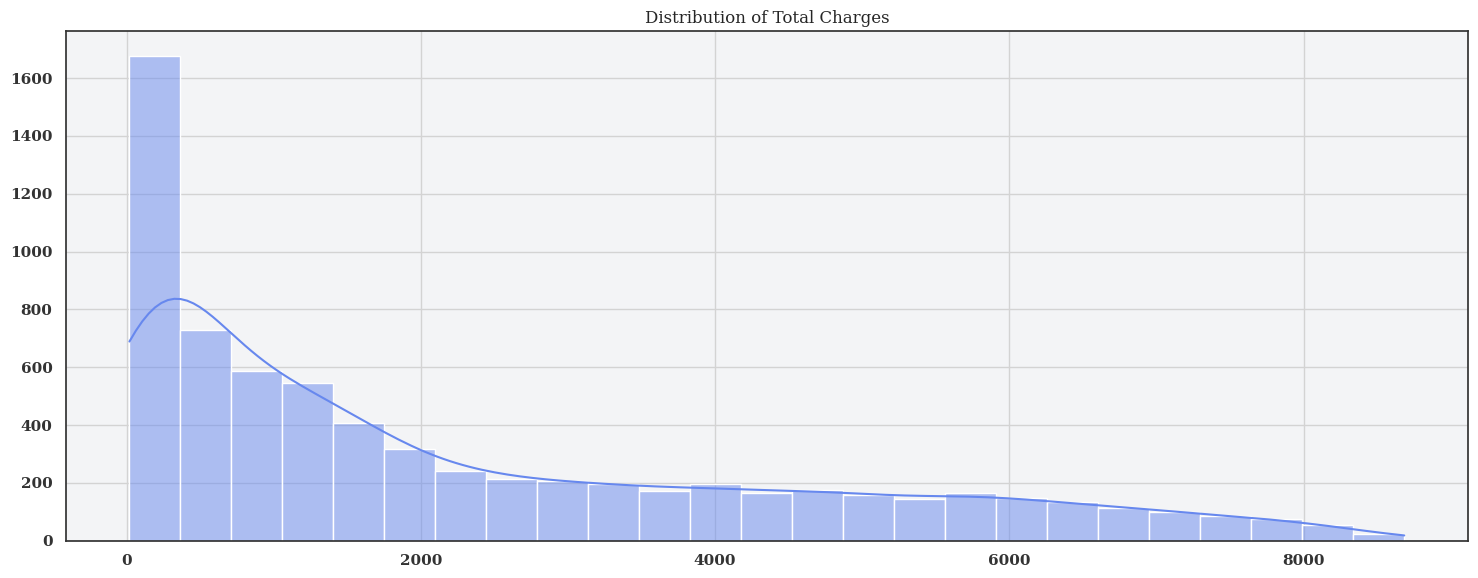

In [ ]:
sns.histplot(data=df, x='TotalCharges', kde=True)
plt.title("Distribution of Total Charges")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Inference on the Distribution of Total Charges Chart:**

- **High Frequency at Low Total Charges**: Most customers have low total charges, likely representing newer or short-term customers.
- **Gradual Decline**: There’s a steady decrease in the number of customers as total charges increase, suggesting fewer long-term or high-paying customers.
  
This distribution highlights a customer base with mostly lower total expenditures, likely due to shorter subscription periods or limited service usage.

## **Step C: Bivariate Analysis**

### **Plot boxplots for `tenure`, `MonthlyCharges`, and `TotalCharges` against `Churn` to see if churned customers have different distributions in these variables.**

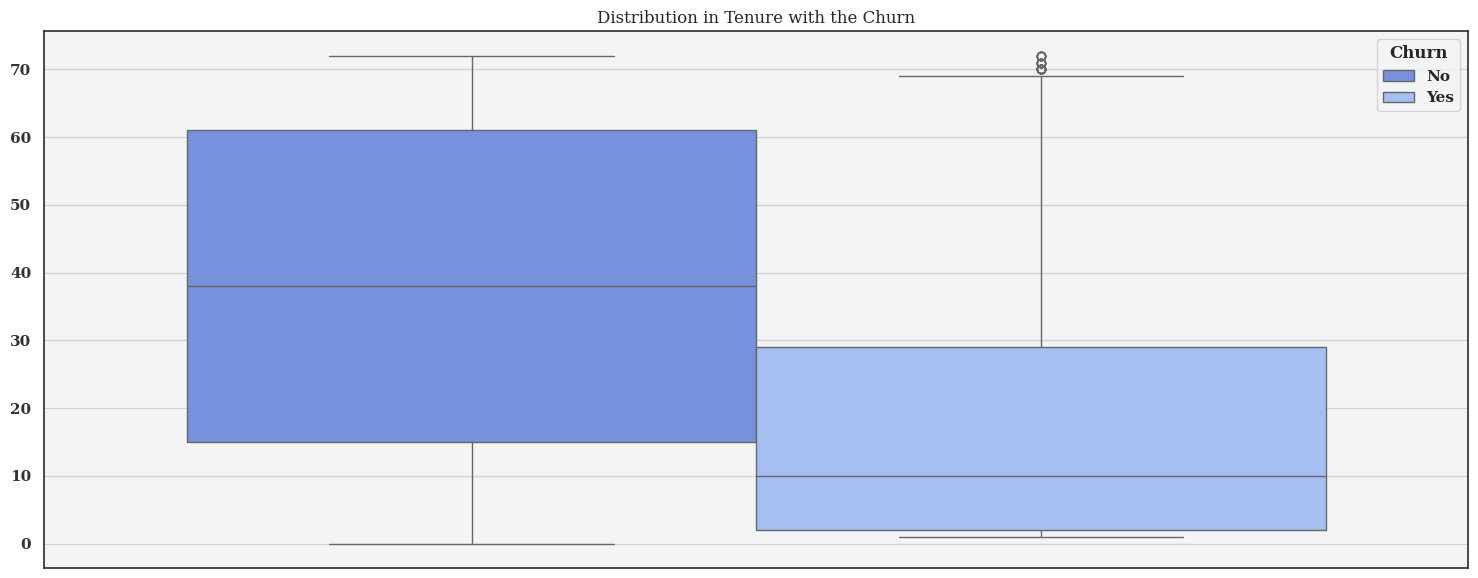

In [ ]:
sns.boxplot(data=df, y='tenure', hue='Churn')
plt.title("Distribution in Tenure with the Churn")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Insights from Tenures Distribution by Churn Status:**

- Customers who **did not churn** (blue) generally have higher tenure, with a median around 40.
- Customers who **churned** (red) tend to have lower tenure, with a median around 10.
- There is a wider range of total charges for customers who did not churn, while the distribution for churned customers is more condensed with fewer outliers.
- This suggests that higher lower tenure may be associated with longer customer retention.

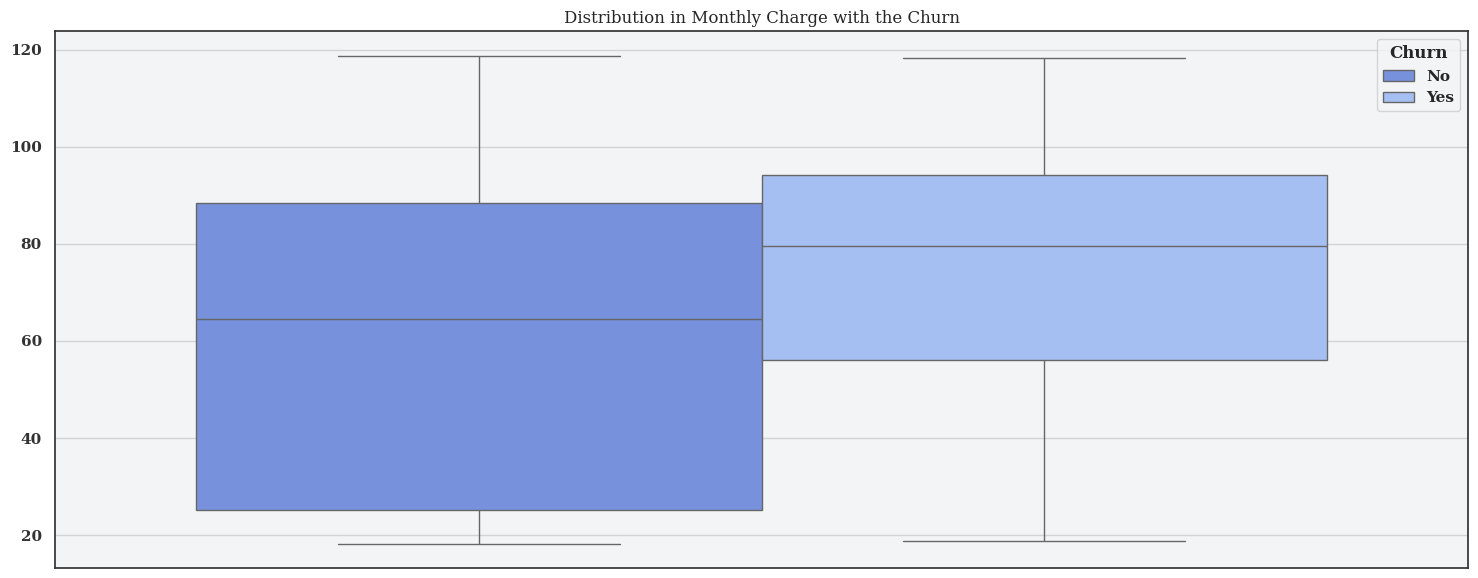

In [ ]:
sns.boxplot(data=df, y='MonthlyCharges', hue='Churn')
plt.title("Distribution in Monthly Charge with the Churn")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Insights from Monthly Charges Distribution by Churn Status:**

- Customers who **did not churn** (blue) trend to have lower monthly charges, with a median around 65.
- Customers who **churned** (red) tend to have higher monthly charges, with a median around 80.
- There is a wider range of monthly charges for customers who did not churn, with no outliers, while the distribution for churned customers is more condensed with fewer outliers.
- This suggests that lower monthly charges may be associated with longer customer retention.

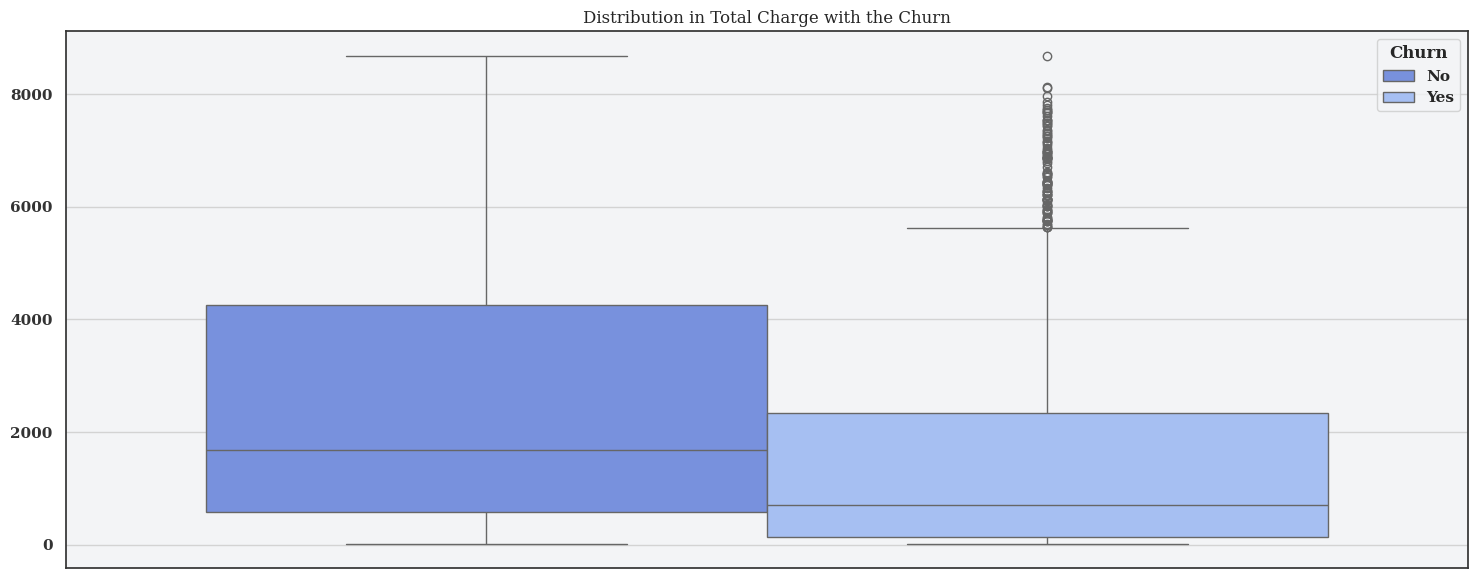

In [ ]:
sns.boxplot(data=df, y='TotalCharges', hue='Churn')
plt.title("Distribution in Total Charge with the Churn")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Insights from Total Charges Distribution by Churn Status:**

- Customers who **did not churn** (blue) generally have higher total charges, with a median around 4,000.
- Customers who **churned** (red) tend to have lower total charges, with a median around 1,500.
- There is a wider range of total charges for customers who did not churn, while the distribution for churned customers is more condensed with some outliers.
- This suggests that higher total charges may be associated with longer customer retention.


### **Use count plots for variables like `Contract`, `PaymentMethod`, `InternetService`, and `TechSupport` against `Churn`.**

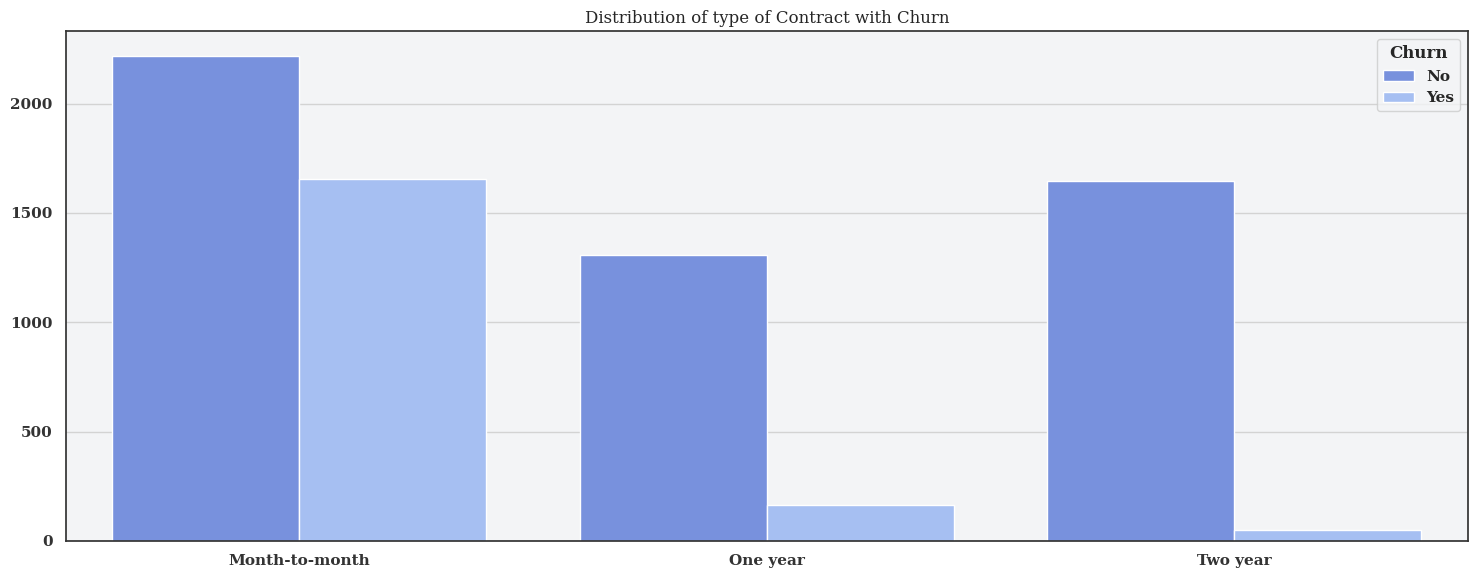

In [ ]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Distribution of type of Contract with Churn")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Inference from Contract Type vs. Churn Chart:**

The chart illustrates the relationship between contract types and churn among customers. Key observations include:

- **Month-to-Month Contracts**: Customers with month-to-month contracts exhibit the highest churn rate, suggesting a need for retention strategies targeting this group.
- **One-Year Contracts**: These contracts show a moderate churn rate, indicating a higher customer commitment than month-to-month contracts.
- **Two-Year Contracts**: Customers with two-year contracts have the lowest churn rate, highlighting that longer-term contracts are associated with increased customer retention.

**Overall Insight**: There is a clear trend where longer contract commitments correspond to lower churn rates. This suggests that providing incentives for month-to-month customers to switch to longer-term contracts could reduce overall churn.


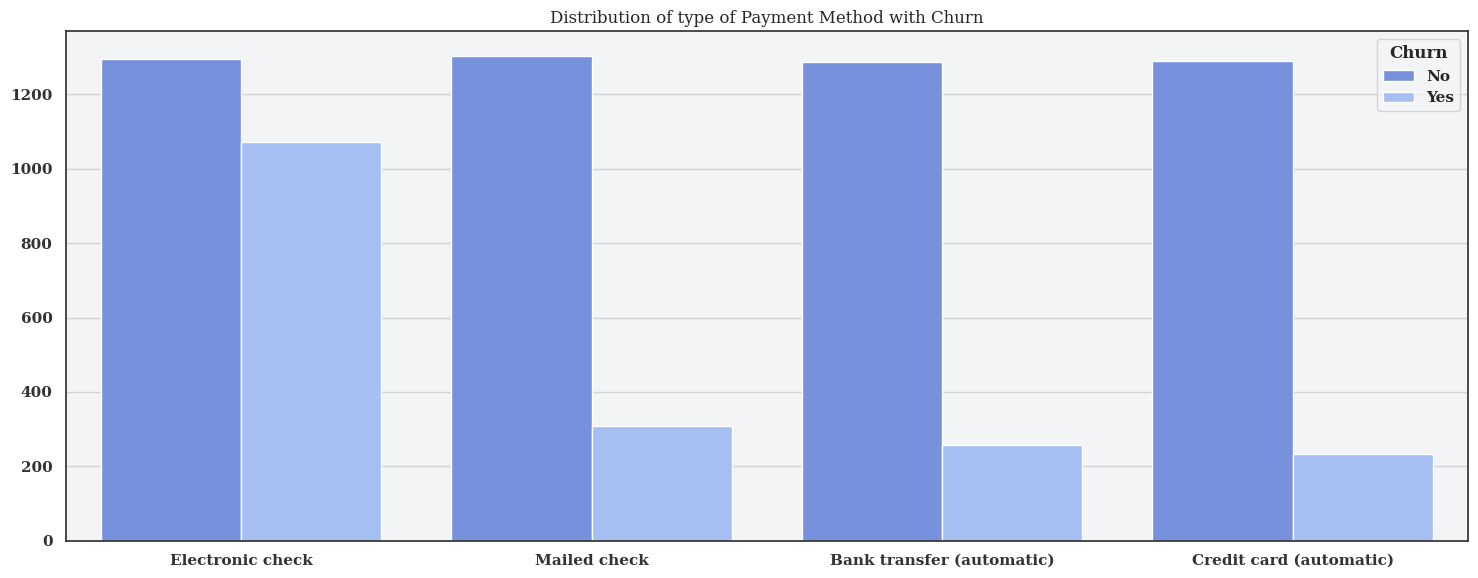

In [ ]:
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title("Distribution of type of Payment Method with Churn")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Inference from Payment Method vs. Churn Chart:**

The chart illustrates the relationship between payment method and churn among customers. Key observations include:

- **Electronic Check Method**: Customers with electronic check methods exhibit the highest churn rate, suggesting a need for retention strategies targeting this group.
- **Mailed Ckeck Method**: These method show a moderate churn rate, indicating a higher customer commitment than electronic check method.
- **Bank Transfer (Automatic) Method**: These method also show a moderate churn rate, indicating a higher customer commitment than electronic check method and almost same as mailed check method.
- **Credit Card (Automatic) Method**: These method also show a moderate churn rate, indicating a higher customer commitment than electronic check method and almost same as both mailed check and bank transfer method.

**Overall Insight**: The analysis reveals that customers using **automatic payment methods** (bank transfer and credit card) generally exhibit a lower churn rate compared to those using **electronic check** or **mailed check** methods. This trend suggests that automatic payment methods are associated with higher customer retention. Encouraging customers, particularly those using electronic check, to switch to an automatic payment option could potentially reduce overall churn and increase customer loyalty.

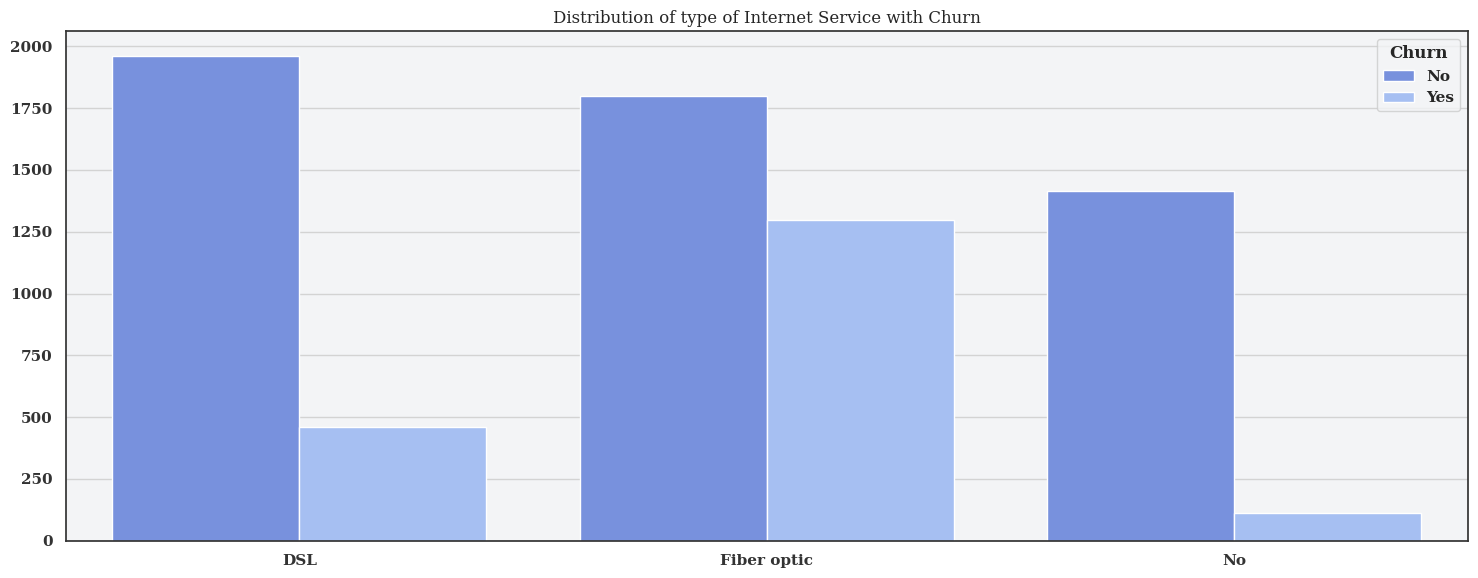

In [ ]:
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("Distribution of type of Internet Service with Churn")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Inference from Internet Service vs. Churn Chart:**

The chart illustrates the relationship between internet service and churn among customers. Key observations include:

- **Fiber Optic Service**: Customers with fiber optic service exhibit the highest churn rate, suggesting a need for retention strategies targeting this group.
- **DSL Service**: These method show a moderate churn rate, indicating a higher customer commitment than fiber optic service.
- **No Internet Service**: These service have the lowest churn rate compared to the other two services.

**Overall Insight**: The analysis reveals that customers with **fiber optic internet service** have the highest churn rate, indicating potential dissatisfaction or unmet expectations within this group. In contrast, **DSL service** customers show a moderate churn rate, suggesting greater stability and commitment compared to fiber optic users. Notably, customers without internet service have the **lowest churn rate**, possibly reflecting a lack of reliance on internet connectivity or satisfaction with other services. These findings imply that targeted retention efforts for fiber optic users, such as addressing service quality or pricing concerns, could help reduce c


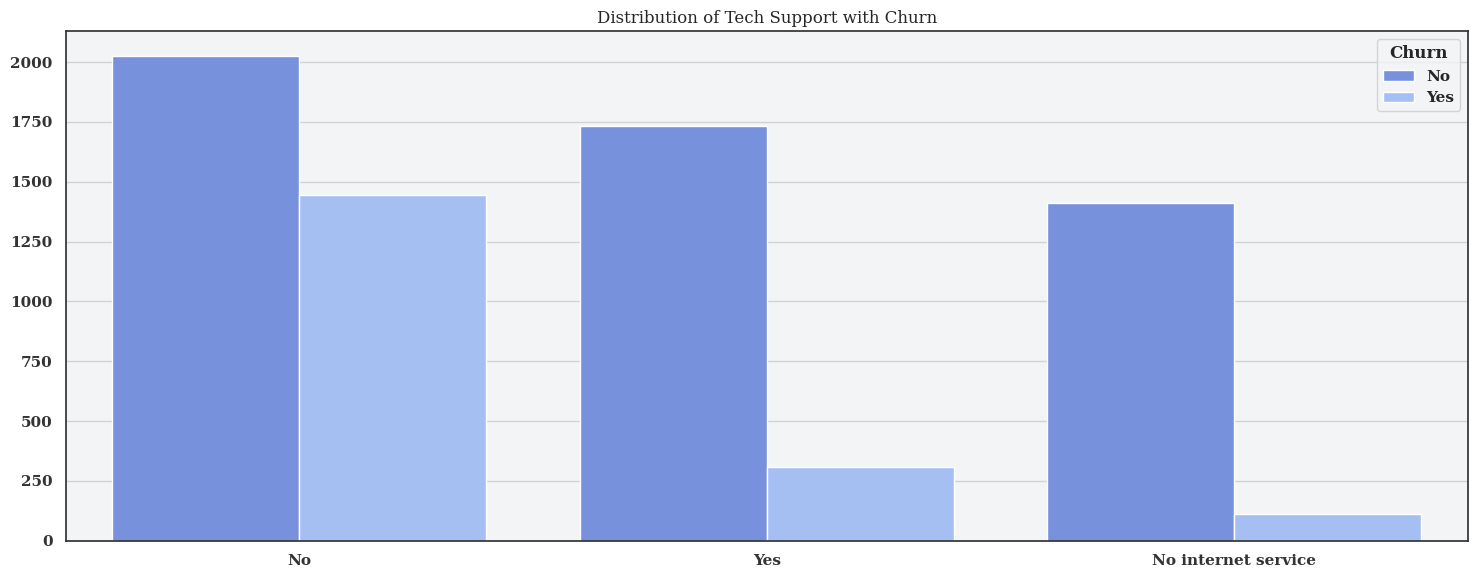

In [ ]:
sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.title("Distribution of Tech Support with Churn")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

### **Calculate correlations between `tenure`, `MonthlyCharges`, and `TotalCharges` to understand their relationships.**

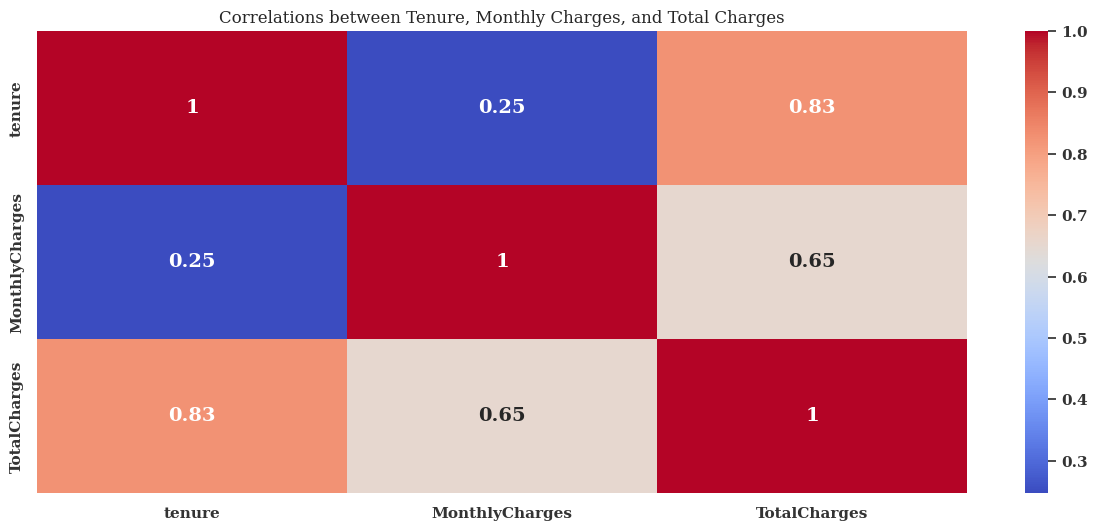

In [ ]:
numeric_df=df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlations between Tenure, Monthly Charges, and Total Charges")
plt.show()

**Insights from the Correlation Matrix:**

- **Tenure and TotalCharges** have a strong positive correlation (0.83), suggesting that customers with longer tenures tend to have higher total charges.
- **MonthlyCharges and TotalCharges** also have a moderate positive correlation (0.65), indicating that higher monthly charges are associated with higher total charges.
- **Tenure and MonthlyCharges** have a weak positive correlation (0.25), implying little to no relationship between a customer's tenure and their monthly charges.


## **Step D: Multivariate Analysis**

### **Explore how `tenure` varies with subscription services (`PhoneService`, `InternetService`, `StreamingTV`, `StreamingMovies`).**

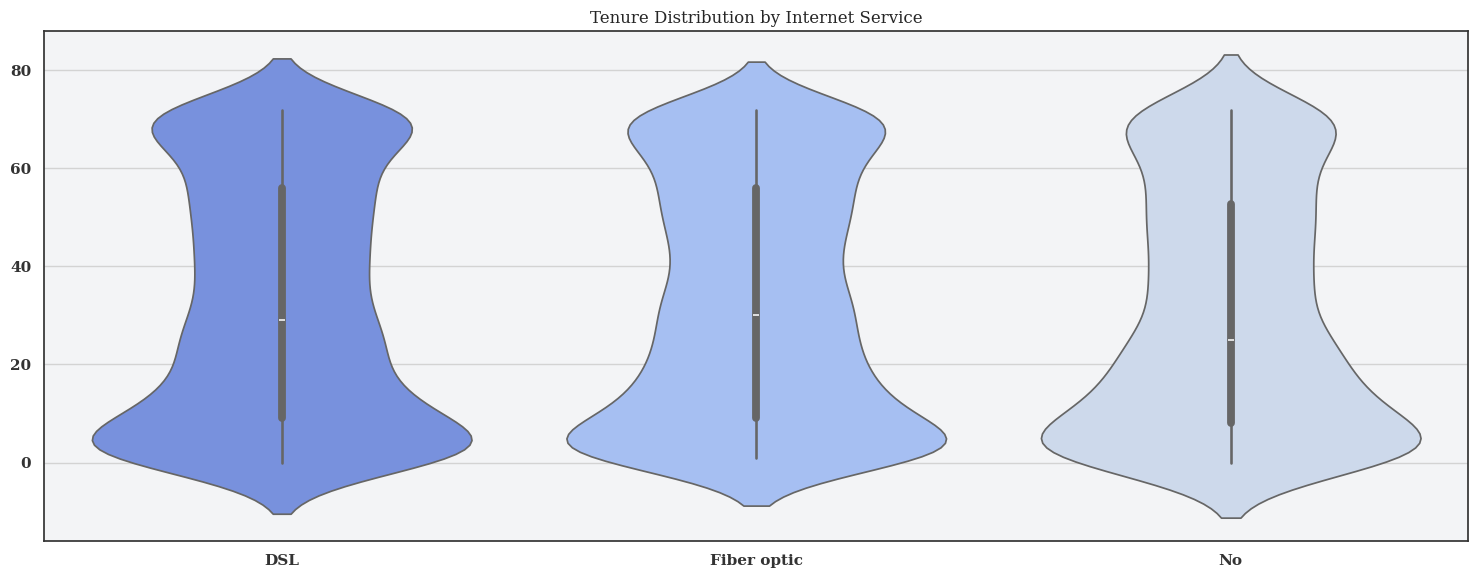

In [ ]:
sns.violinplot(data=df, x='InternetService', y='tenure', hue='InternetService')
plt.title('Tenure Distribution by Internet Service')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Insights from Tenure Distribution by Internet Service Type:**

- **DSL** customers have a relatively balanced tenure distribution, with a slight concentration around higher tenures, indicating many customers have stayed for a longer period.
- **Fiber Optic** customers show a higher concentration in lower tenures, suggesting that this group tends to have shorter retention periods compared to DSL.
- Customers with **No Internet Service** have a fairly uniform distribution, with no particular tenure range standing out, likely indicating that tenure is less affected by internet service in this category.


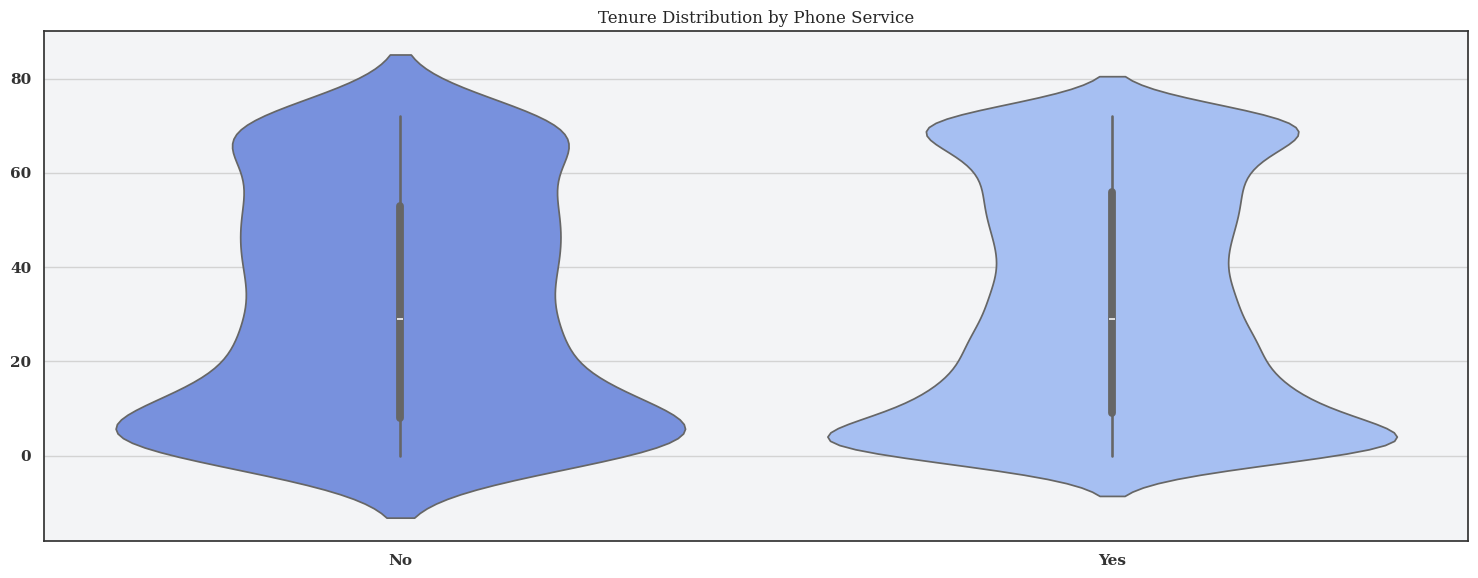

In [ ]:
sns.violinplot(data=df, x='PhoneService', y='tenure', hue='PhoneService')
plt.title('Tenure Distribution by Phone Service')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Insights from Tenure Distribution by Phone Service:**

- **Customers Without Phone Service**: The tenure distribution for customers without phone service shows a balanced spread across various tenure lengths, with a slight concentration around medium tenure values. This indicates that customers without phone service are spread across different retention periods, with no extreme tendency toward short or long tenure.

- **Customers With Phone Service**: The tenure distribution for customers with phone service is also spread across a range of tenure lengths but has a higher concentration around the mid-range tenure. This suggests that most customers with phone service fall in the moderate retention period, with fewer extreme tenures on either end of the distribution.

**Overall Insight**: Both groups display a relatively even tenure distribution, indicating that phone service availability does not heavily impact tenure length. However, a slightly higher concentration in the mid-tenure range for customers with phone service may imply some degree of stability in this segment.

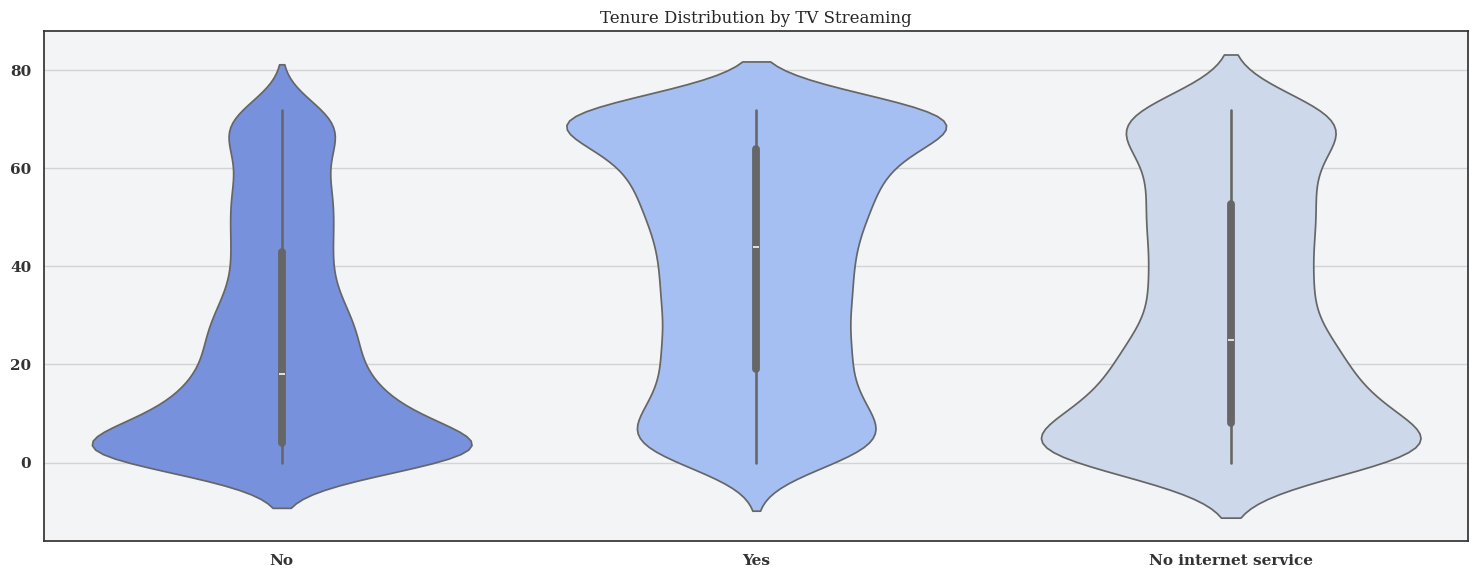

In [ ]:
sns.violinplot(data=df, x='StreamingTV', y='tenure', hue='StreamingTV')
plt.title('Tenure Distribution by TV Streaming')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Insights from Tenure Distribution by TV Streaming Service:**

- **No TV Streaming**: Customers without TV streaming service exhibit a balanced tenure distribution with a slight concentration around medium tenures, indicating that a significant portion of these customers stay for a moderate period without opting for TV streaming.

- **TV Streaming Enabled**: Customers who have opted for TV streaming show a broader spread in tenure, with the distribution concentrated around medium tenures as well. This suggests that while TV streaming customers are spread across different tenure lengths, they lean towards staying for a moderate amount of time.

- **No Internet Service**: For customers with no internet service (and hence no TV streaming), the tenure distribution appears relatively even, with no strong concentration in any tenure range. This may suggest that tenure length is less impacted by the lack of internet and TV streaming services in this category.

**Overall Insight**: Both customers with and without TV streaming services exhibit moderate retention periods, with a slight tendency for mid-range tenures. The absence of TV streaming appears not to significantly influence tenure, but retention strategies could target TV streaming subscribers to ensure long-term engagement.


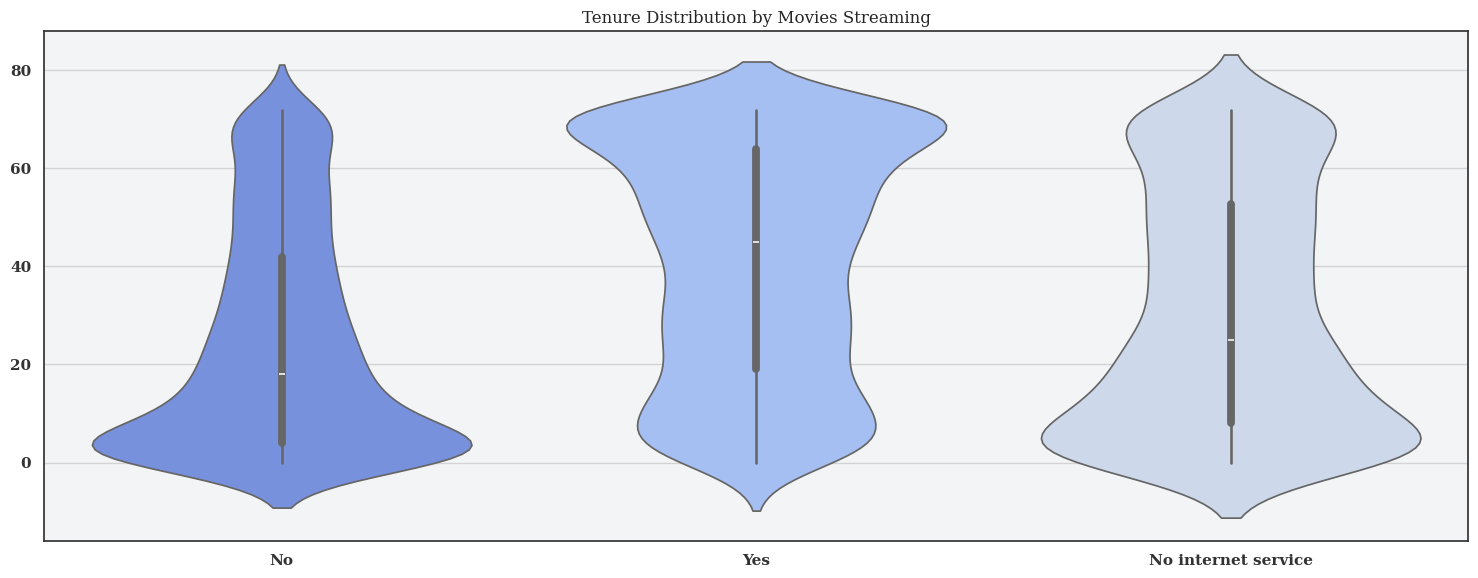

In [ ]:
sns.violinplot(data=df, x='StreamingMovies', y='tenure', hue='StreamingMovies')
plt.title('Tenure Distribution by Movies Streaming')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Insights from Tenure Distribution by Movies Streaming:**


The violin plot reveals a clear distinction in tenure distribution based on movie streaming habits:

* **Yes (Stream Movies):** This group exhibits a wider distribution, with a notable peak around the higher tenure range. This indicates that customers who stream movies tend to stay with the company for a longer duration.
* **No (Do not Stream Movies):** This group shows a more concentrated distribution, with a peak at a lower tenure range. This suggests that customers who do not stream movies have a shorter average tenure.

**Overall Insight**: It's worth noting that while the "No Internet Service" group has the highest median tenure, the distribution is much narrower compared to the "Yes" group. This might suggest that factors other than movie streaming influence tenure for customers without internet service.

### **Analyze how different services impact `MonthlyCharges`. For example, compare `MonthlyCharges` across different `InternetService` types.**

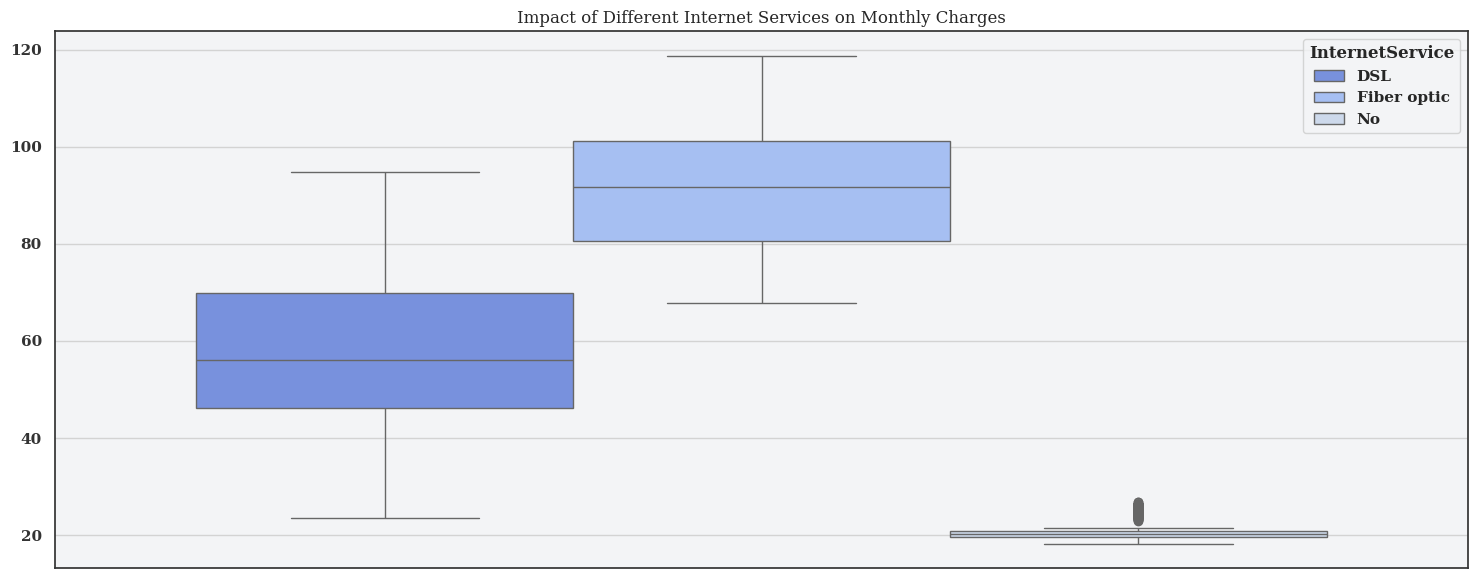

In [ ]:
sns.boxplot(data=df, y='MonthlyCharges', hue='InternetService')
plt.title("Impact of Different Internet Services on Monthly Charges")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Insights from Impact of Different Internet Services on Monthly Charges:**

**Fiber Optic** internet service has the highest monthly charges, while No Internet Service has the lowest.

* **Fiber Optic:** This service has the highest median charge, indicating that customers typically pay more for this service. The box also shows a wider range and a longer whisker, suggesting greater variability in charges.
* **DSL:** This service has a lower median charge compared to Fiber Optic. The box is narrower, indicating less variability in charges.
* **No Internet Service:** This group has the lowest median charge, as expected. The distribution is highly concentrated, suggesting that charges for this group are relatively consistent.

**Overall Insights:** It's important to note that the **No Internet** Service group might have additional charges or fees, which are not captured in this plot.

### **Segment customers by `Contract` type and analyze their average `tenure`, `MonthlyCharges`, and `Churn rates`.**

In [ ]:
summary_table=df.groupby('Contract').agg(
    Avg_Tenure=('tenure', 'mean'),
    Avg_Monthly_Charge=('MonthlyCharges', 'mean'),
    Churn_Rate_pct=('Churn', lambda x: (x=='Yes').mean()*100)
).reset_index()


summary_table

,Contract,Avg_Tenure,Avg_Monthly_Charge,Churn_Rate_pct
0,Month-to-month,18.036645,66.398490,42.709677
1,One year,42.044807,65.048608,11.269518
2,Two year,56.735103,60.770413,2.831858


In [ ]:
melted_summary=summary_table.melt(id_vars='Contract', var_name='Metric', value_name='Value')
melted_summary

,Contract,Metric,Value
0,Month-to-month,Avg_Tenure,18.036645
1,One year,Avg_Tenure,42.044807
2,Two year,Avg_Tenure,56.735103
3,Month-to-month,Avg_Monthly_Charge,66.398490
4,One year,Avg_Monthly_Charge,65.048608
5,Two year,Avg_Monthly_Charge,60.770413
6,Month-to-month,Churn_Rate_pct,42.709677
7,One year,Churn_Rate_pct,11.269518
8,Two year,Churn_Rate_pct,2.831858


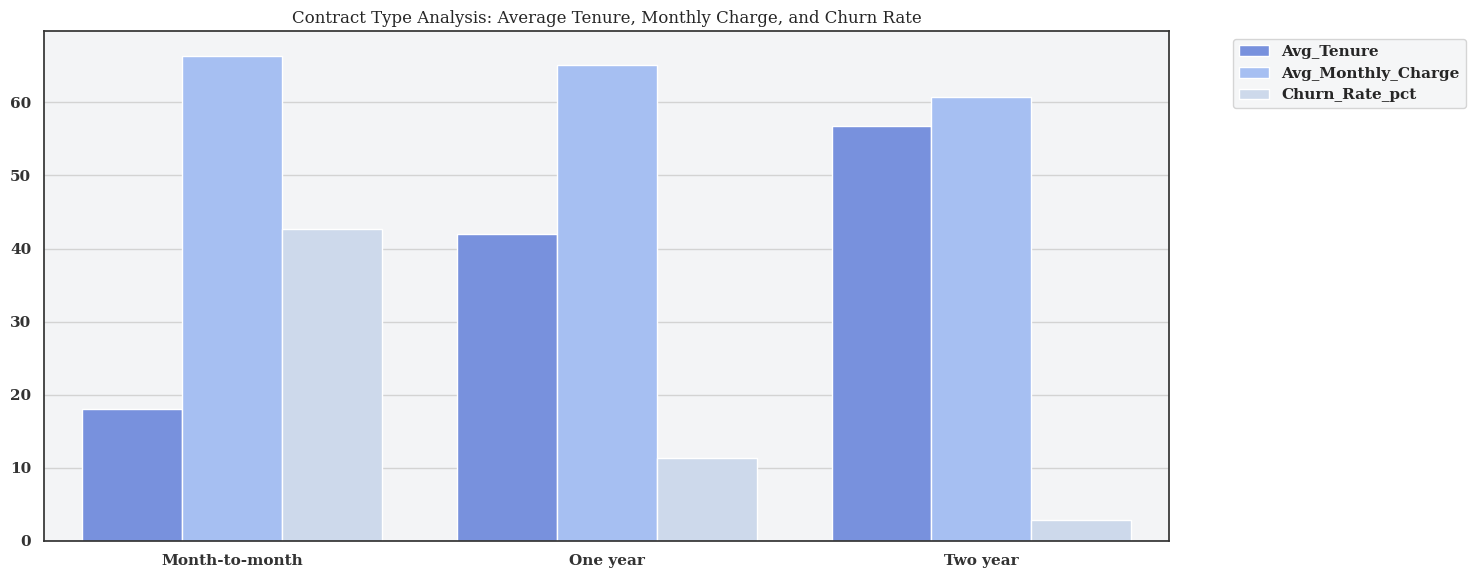

In [ ]:
sns.barplot(x='Contract', y='Value', hue='Metric', data=melted_summary)
plt.title('Contract Type Analysis: Average Tenure, Monthly Charge, and Churn Rate')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Insights from Contract Type Analysis: Average Tenure, Monthly Charge, and Churn Rate**

This chart provides a comparative analysis of key metrics across different contract types:

**Tenure:**

* **Month-to-Month:** Customers on this plan have the shortest average tenure.
* **One-Year:** This plan shows a significant increase in average tenure compared to Month-to-Month.
* **Two-Year:** Customers with Two-Year contracts exhibit the highest average tenure, indicating a strong commitment.

**Monthly Charge:**

* **Month-to-Month:** Despite the lowest tenure, customers on this plan have the highest average monthly charge.
* **One-Year:** This plan shows a moderate decrease in average monthly charge compared to Month-to-Month.
* **Two-Year:** Customers with Two-Year contracts have the lowest average monthly charge, suggesting potential discounts for longer commitments.

**Churn Rate:**

* **Month-to-Month:** This plan has the highest churn rate, indicating a higher propensity for customers to switch providers.
* **One-Year:** The churn rate decreases significantly for One-Year contracts.
* **Two-Year:** Customers with Two-Year contracts have the lowest churn rate, further reinforcing the impact of longer commitments on customer retention.

**Overall Insights:** The chart highlights the trade-offs between flexibility, cost, and customer loyalty associated with different contract types.

## **Step E: Advanced Visualizations**

### **Create pair plots to visualize interactions among `tenure`, `MonthlyCharges`, and `TotalCharges`, particularly segmented by `Churn`.**

In [ ]:
numeric_df_churn=df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
numeric_df_churn.head()

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,No
1,34,56.95,1889.50,No
2,2,53.85,108.15,Yes
3,45,42.30,1840.75,No
4,2,70.70,151.65,Yes


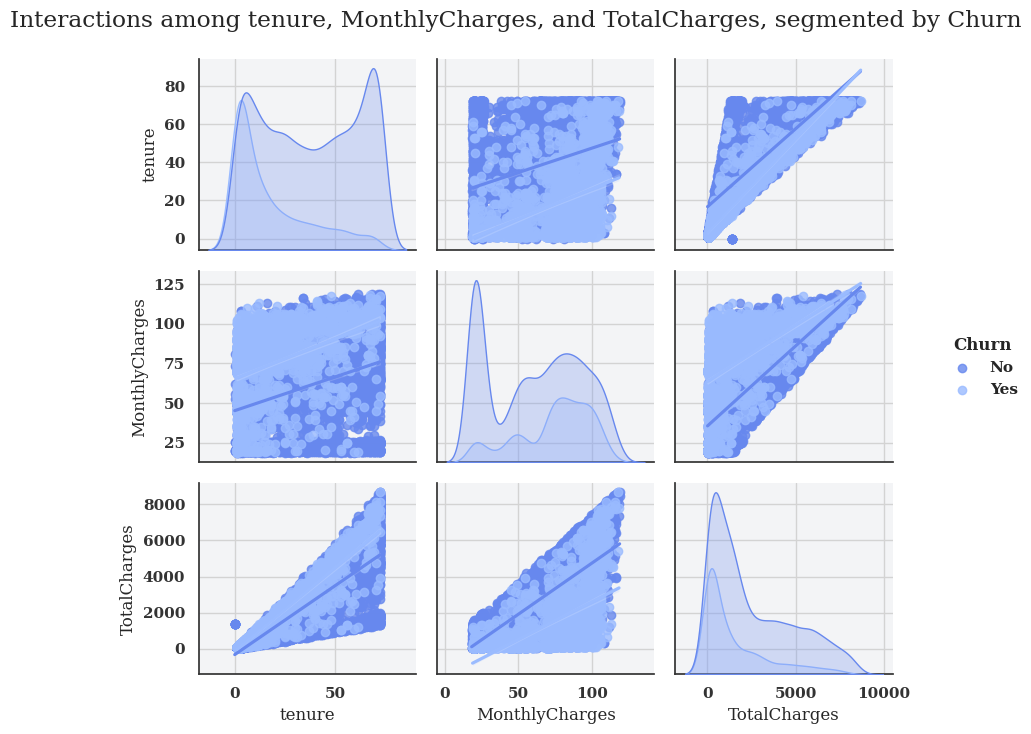

In [ ]:
sns.pairplot(numeric_df_churn, hue='Churn', kind='reg')
plt.suptitle('Interactions among tenure, MonthlyCharges, and TotalCharges, segmented by Churn')
plt.tight_layout()
plt.show()

**Inferences from the Interactions Among Tenure, MonthlyCharges, and TotalCharges, Segmented by Churn**

- **Tenure vs. Churn**:
    - Customers with longer tenure (higher number of months) are less likely to churn, as shown by the density plot on the upper left.
    - A higher concentration of churn (in red) appears in the early tenure months, suggesting that customers who leave tend to do so early in their service period.

- **Monthly Charges vs. Churn**:
    - Churned customers (in red) tend to have higher monthly charges, as indicated by the density plot and scatter plot in the middle row. This suggests a potential association between higher monthly costs and increased likelihood of churn.
    - Lower monthly charges are more associated with customers who do not churn.

- **Total Charges vs. Churn**:
    - Total charges, a cumulative measure over tenure, show that customers with higher total charges generally have longer tenures and are less likely to churn. This is reflected by the strong correlation between tenure and total charges.
    - Churned customers tend to have lower total charges, which aligns with shorter tenures and possibly reflects an exit from the service before accumulating high total charges.

- **Interaction Insights**:
    - The linear relationship between total charges and tenure is clear for both churned and non-churned customers, as total charges are directly tied to how long customers stay.
    - Monthly charges appear to be a more influential factor in churn compared to tenure alone, as churned customers are more prevalent at higher monthly charge levels, irrespective of total tenure.

**Summary:** High monthly charges and low tenure are key indicators of churn, while customers with lower monthly charges and longer tenure are less likely to churn.


### **Analyze `PaperlessBilling` and `PaymentMethod` against `Churn` to see if these billing preferences impact churn rates.**

In [ ]:
churn_summary=df.groupby(['PaperlessBilling', 'PaymentMethod']).agg(
    Churn_Rate_pct=('Churn', lambda x: (x=='Yes').mean()*100)
).reset_index()

In [ ]:
churn_summary

,PaperlessBilling,PaymentMethod,Churn_Rate_pct
0,No,Bank transfer (automatic),11.026034
1,No,Credit card (automatic),10.000000
2,No,Electronic check,32.744783
3,No,Mailed check,13.493724
4,Yes,Bank transfer (automatic),20.875421
5,Yes,Credit card (automatic),19.047619
6,Yes,Electronic check,49.770379
7,Yes,Mailed check,27.286585


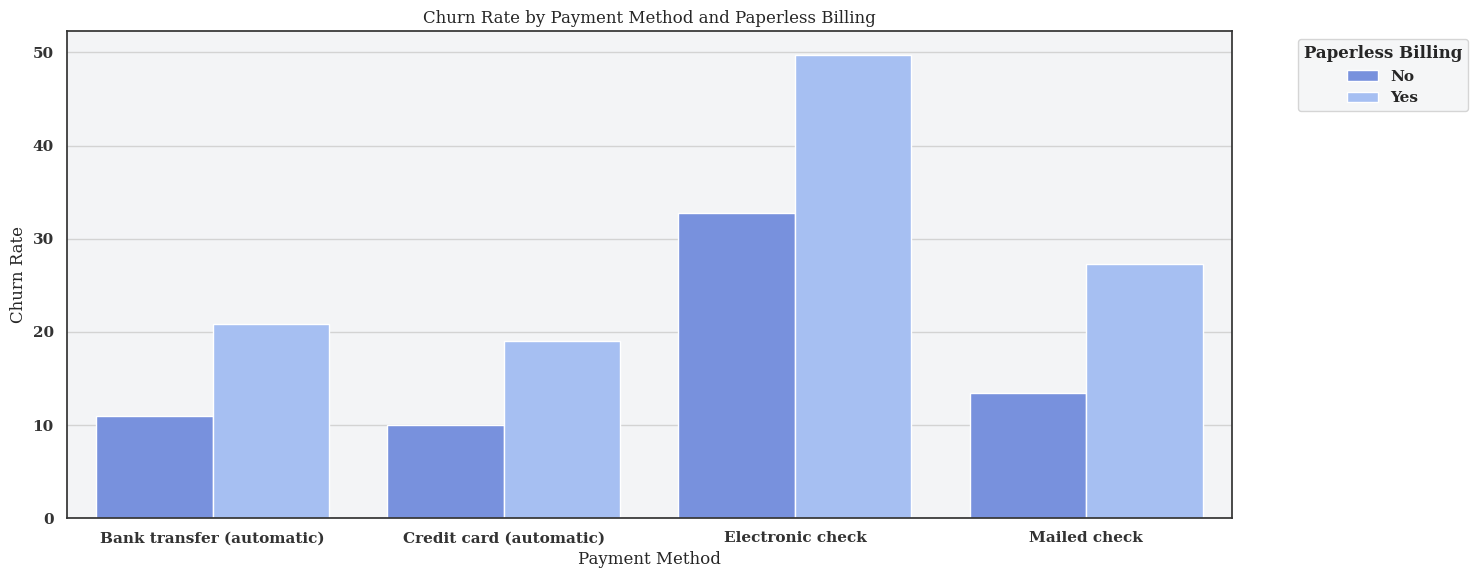

In [ ]:
sns.barplot(data=churn_summary, x='PaymentMethod', y='Churn_Rate_pct', hue='PaperlessBilling')
plt.title('Churn Rate by Payment Method and Paperless Billing')
plt.ylabel('Churn Rate')
plt.xlabel('Payment Method')
plt.legend(title='Paperless Billing', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Insights from Churn Rate by Payment Method and Paperless Billing**

This chart provides a detailed breakdown of churn rates based on payment method and paperless billing preferences:

**Payment Method:**

* **Electronic Check:** This payment method has the lowest churn rate, indicating that customers using this method tend to be more loyal.
* **Credit Card (Automatic):** This method also shows a relatively low churn rate.
* **Bank Transfer (Automatic):** This method has a slightly higher churn rate compared to Electronic Check and Credit Card.
* **Mailed Check:** This method has the highest churn rate, suggesting that customers using this method might be less committed to the service.

**Paperless Billing:**

* **No:** Customers who do not opt for paperless billing have a significantly higher churn rate across all payment methods. This suggests that paperless billing might contribute to increased customer satisfaction and retention.
* **Yes:** Customers who choose paperless billing have a consistently lower churn rate, regardless of the payment method.

**Overall Insights**, the chart highlights the importance of payment method and paperless billing preferences in predicting customer churn. Customers who opt for Electronic Check or Credit Card and choose paperless billing appear to be more likely to stay with the service.

### **Cohort Analysis: Group customers based on `tenure` ranges (e.g., *0–12*, *13–24* months) to observe churn patterns over time.**

In [ ]:
bins=[0, 12, 24, 36, 48, 60, df['tenure'].max()]
labels=['0–12', '13–24', '25–36', '37–48', '49–60', '61+']

df['tenure_range']=pd.cut(df['tenure'], bins=bins, labels=labels, right=False)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0–12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25–36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0–12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37–48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0–12


In [ ]:
cohort_churn=df.groupby('tenure_range').agg(
    Churn_Rate_pct=('Churn', lambda x: (x=='Yes').mean()*100)
).reset_index()

cohort_churn

,tenure_range,Churn_Rate_pct
0,0–12,48.284195
1,13–24,29.512894
2,25–36,22.031963
3,37–48,19.518717
4,49–60,15.000000
5,61+,8.296164


In [ ]:
cohort_churn=cohort_churn.sort_values('Churn_Rate_pct', ascending=False).reset_index(drop=True)

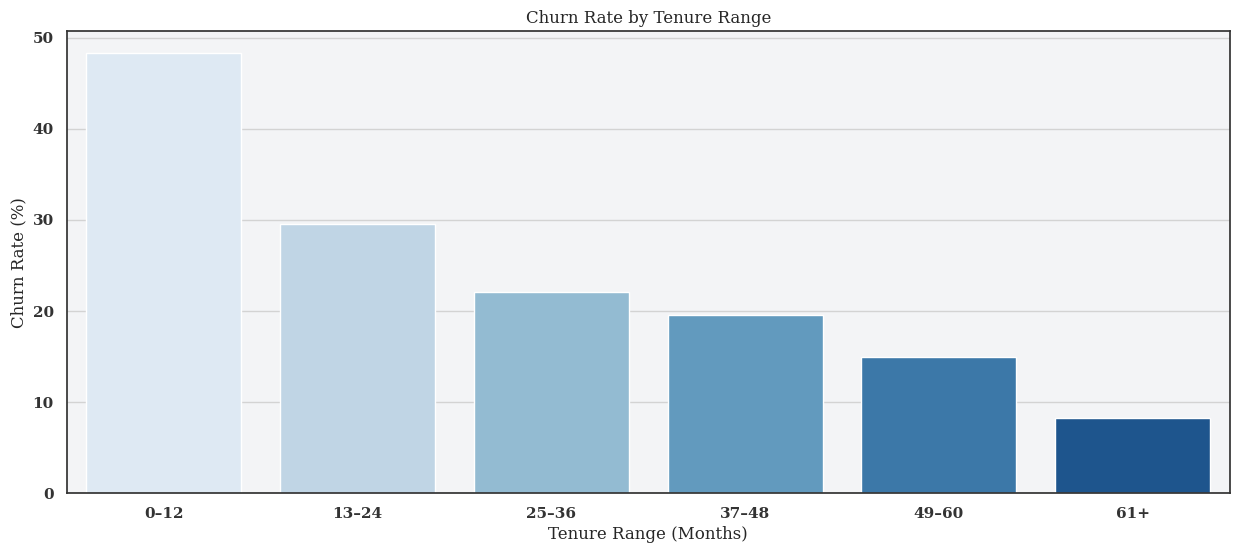

In [ ]:
colors=sns.color_palette("Blues", n_colors=len(cohort_churn))

sns.barplot(x='tenure_range', y='Churn_Rate_pct', data=cohort_churn, palette=colors)
plt.title('Churn Rate by Tenure Range')
plt.xlabel('Tenure Range (Months)')
plt.ylabel('Churn Rate (%)')
plt.show()

**Insights from Churn Rate by Tenure Range**

This bar chart illustrates the relationship between customer tenure and churn rate:

* **0-12 Months:** Customers in the initial 12 months of their subscription have the highest churn rate. This suggests that the first year is a critical period for customer retention.
* **13-24 Months:** Churn rate decreases significantly in the 13-24 month range, indicating that customers who stay beyond the initial year are less likely to churn.
* **25-36 Months:** The downward trend continues, with a further decrease in churn rate for customers in the 25-36 month range.
* **37-48 Months:** Churn rate remains relatively low in this tenure range.
* **49-60 Months:** A slight increase in churn rate is observed, but it's still lower compared to the initial months.
* **60+ Months:** Customers with a tenure of 60+ months have the lowest churn rate, suggesting strong customer loyalty and satisfaction at this stage.

**Overall Insights** The chart highlights a clear pattern of decreasing churn rate as customers spend more time with the service, churn rate decreases as tenure increases.

# **Hypothesis Test**

## **Normality Test**

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0–12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25–36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0–12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37–48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0–12


### Check `tenure`, `MonthlyCharges` and `TotalCharges` follows normal distribution or not.



In [ ]:
from scipy.stats import shapiro

def normality_test(data):
    """
    Perform the Shapiro-Wilk test for normality on the given dataset.

    Parameters:
    data (array-like): The dataset or column of data to test for normality.

    Returns:
    None: Prints the test statistic and p-value, and indicates if the data is
    normally distributed based on a 0.05 significance level.

    Interpretation:
    If the p-value is less than 0.05, the data is considered not normally
    distributed. If the p-value is 0.05 or higher, the data is considered
    normally distributed.
    """
    stat, p_value=shapiro(data)
    print(f'Statistic: {stat}, p-value: {p_value}')

    if p_value < 0.05:
        print("The data is not normally distributed.")
    else:
        print("The data is normally distributed.")

**Check for `tenure`:**

**Null Hypothesis (H₀):** The data is normally distributed.

**Alternative Hypothesis (H₁):** The data is not normally distributed.

In [ ]:
normality_test(df['tenure'])

Statistic: 0.9037273891853457, p-value: 7.527283766475277e-55
The data is not normally distributed.


**Check for `MonthlyCharges`:**

**Null Hypothesis (H₀):** The data is normally distributed.

**Alternative Hypothesis (H₁):** The data is not normally distributed.

In [ ]:
normality_test(df['MonthlyCharges'])

Statistic: 0.9208891764819073, p-value: 2.2295643949026396e-51
The data is not normally distributed.


**Check for `TotalCharges`:**

**Null Hypothesis (H₀):** The data is normally distributed.

**Alternative Hypothesis (H₁):** The data is not normally distributed.

In [ ]:
normality_test(df['TotalCharges'])

Statistic: 0.8603441208009667, p-value: 9.497691568057198e-62
The data is not normally distributed.


## **Other Test**

### **1. Monthly Charges and Churn Patterns**

**Hypothesis 1:** Churned customers have different average monthly charges compared to non-churned customers.

**H₀:** There is no significant difference in average `MonthlyCharges` between churned and non-churned customers.

**H₁:** There is a significant difference in average `MonthlyCharges` between churned and non-churned customers.

**Solve by Two-sample T-test**

In [ ]:
churned=df[df['Churn'] == 'Yes']
not_churned=df[df['Churn'] == 'No']

In [ ]:
from scipy.stats import ttest_ind

stat, p_value=ttest_ind(churned['MonthlyCharges'], not_churned['MonthlyCharges'])

print(f'Statistic: {stat}, p-value: {p_value}')

if p_value < 0.05:
  print("✅ Result: Reject the Null Hypothesis (H₀)")
  print("  ➡ There *is* a statistically significant difference in average MonthlyCharges between churned and non-churned customers (p < 0.05).")
else:
  print("🚨 Result: Fail to Reject the Null Hypothesis (H₀)")
  print("  ➡ There is *no* statistically significant difference in average MonthlyCharges between churned and non-churned customers (p ≥ 0.05).")

Statistic: 16.536738015936308, p-value: 2.7066456068884154e-60
✅ Result: Reject the Null Hypothesis (H₀)
  ➡ There *is* a statistically significant difference in average MonthlyCharges between churned and non-churned customers (p < 0.05).


**Hypothesis 2:** Customers with different `contract types` have varying `monthly charges`.

**H₀:** The mean `MonthlyCharges` is the same across all Contract types (Month-to-month, One year, Two years).

**H₁:** The mean `MonthlyCharges` differs significantly across `Contract types`.

**Solve by One-way ANOVA**

In [ ]:
month_to_month=df[df['Contract'] == 'Month-to-month']['MonthlyCharges']
one_year=df[df['Contract'] == 'One year']['MonthlyCharges']
two_year=df[df['Contract'] == 'Two year']['MonthlyCharges']

In [ ]:
from scipy.stats import f_oneway

stat, p_value=f_oneway(month_to_month, one_year, two_year)

print(f'Statistic: {stat}, p-value: {p_value}')

if p_value < 0.05:
    print("✅ Result: Reject the Null Hypothesis (H₀)")
    print("  ➡ There *is* a statistically significant difference in mean MonthlyCharges across the Contract types (p < 0.05).")
else:
    print("🚨 Result: Fail to Reject the Null Hypothesis (H₀)")
    print("  ➡ There is *no* statistically significant difference in mean MonthlyCharges across the Contract types (p ≥ 0.05).")

Statistic: 20.828045474730274, p-value: 9.575270975935273e-10
✅ Result: Reject the Null Hypothesis (H₀)
  ➡ There *is* a statistically significant difference in mean MonthlyCharges across the Contract types (p < 0.05).


**Hypothesis 3:** Is there a difference in `monthly charges` based on `churn status` and `contract` type?

**H₀:** There is no significant difference in monthly charges based on churn status, contract type, or the interaction between churn status and contract type.

**H₁:** There is a significant difference in monthly charges based on churn status, contract type, or the interaction between churn status and contract type.

**Solve by Two-way ANOVA**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model=ols("MonthlyCharges ~ C(Churn) * C(Contract)", data=df).fit()
anova_table=sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Churn),2.110748e+05,1.0,243.357460,5.797360e-54
C(Contract),1.020540e+04,2.0,5.883128,2.799778e-03
C(Churn):C(Contract),2.382092e+04,2.0,13.732096,1.116437e-06
Residual,6.103503e+06,7037.0,NaN,NaN


Here is the inference based on the provided ANOVA results:

**Churn Status:** There is a significant difference in monthly charges based on churn status, as indicated by a very low p-value (p < 0.001). This suggests that churn status has a meaningful impact on monthly charges.

**Contract Type:** There is a significant difference in monthly charges based on contract type (p = 0.0028). This indicates that the type of contract affects the average monthly charges.

**Interaction between Churn Status and Contract Type:** There is a significant interaction effect between churn status and contract type on monthly charges (p < 0.001). This means that the impact of churn status on monthly charges varies depending on the contract type.

In summary, churn status, contract type, and their interaction all have significant effects on monthly charges.

### **2. Service Preferences and Total Charges**

**Hypothesis 4:** The type of `internet service` affects the `total charges` a customer accumulates over time.

**H₀:** There is no significant difference in `TotalCharges` based on `InternetService` type.
**H₁:** There is a significant difference in `TotalCharges` based on `InternetService` type.

**Solve by One-way ANOVA**

In [ ]:
dsl=df[df['InternetService'] == 'DSL']['TotalCharges']
fiber_optic=df[df['InternetService'] == 'Fiber optic']['TotalCharges']
no=df[df['InternetService'] == 'No']['TotalCharges']

In [ ]:
stat, p_value=f_oneway(dsl, fiber_optic, no)

print(f'Statistic: {stat}, p-value: {p_value}')

if p_value < 0.05:
    print("✅ Result: Reject the Null Hypothesis (H₀)")
    print("  ➡ There *is* a statistically significant difference in mean Total Charges across the Internet Service (p < 0.05).")
else:
    print("🚨 Result: Fail to Reject the Null Hypothesis (H₀)")
    print("  ➡ There is *no* statistically significant difference in mean Total Charges across the Internet Service (p ≥ 0.05).")

Statistic: 798.1133457270053, p-value: 3.93696934826e-313
✅ Result: Reject the Null Hypothesis (H₀)
  ➡ There *is* a statistically significant difference in mean Total Charges across the Internet Service (p < 0.05).


**Hypothesis 5:** Customers who use additional streaming services (`StreamingTV` and `StreamingMovies`) incur higher monthly charges on average.

**H₀:** There is no significant difference in `MonthlyCharges` between customers who use streaming services and those who don’t.

**H₁:** Customers who use streaming services have significantly higher `MonthlyCharges`.

**Solve by Two-sample T-test**

In [ ]:
movie_service=df[df['StreamingMovies'] == 'Yes']['MonthlyCharges']
tv_service=df[df['StreamingTV'] == 'Yes']['MonthlyCharges']

In [ ]:
stat, p_value=ttest_ind(movie_service, tv_service)

print(f'Statistic: {stat}, p-value: {p_value}')

if p_value < 0.05:
    print("✅ Result: Reject the Null Hypothesis (H₀)")
    print("  ➡ Customers who use streaming services *do* incur significantly higher MonthlyCharges on average (p < 0.05).")
else:
    print("🚨 Result: Fail to Reject the Null Hypothesis (H₀)")
    print("  ➡ There is *no* significant difference in MonthlyCharges between customers who use streaming services and those who don’t (p ≥ 0.05).")

Statistic: -0.5203996318869272, p-value: 0.6028062561052427
🚨 Result: Fail to Reject the Null Hypothesis (H₀)
  ➡ There is *no* significant difference in MonthlyCharges between customers who use streaming services and those who don’t (p ≥ 0.05).


### **3. Tenure and Churn**

**Hypothesis 6:** Long-tenured customers are less likely to churn.

**H₀:** There is no significant difference in churn rate across different tenure ranges (e.g., 0–12 months, 13–24 months).

**H₁:** The churn rate significantly differs across tenure ranges.

**Solve by Chi-Square test for Independence**

In [ ]:
contingency_table=pd.crosstab(df['Churn'], df['tenure_range'])
print(contingency_table)

tenure_range  0–12  13–24  25–36  37–48  49–60   61+
Churn                                               
No            1070    738    683    602    697  1028
Yes            999    309    193    146    123    93


In [ ]:
from scipy.stats import chi2_contingency

stat, p_value, dof, expected=chi2_contingency(contingency_table)

print(f'Statistic: {stat}, p-value: {p_value}\nDegree of Freedom: {dof}\nExpected Table: {expected}\n')

if p_value < 0.05:
    print("✅ Result: Reject the Null Hypothesis (H₀)")
    print("  ➡ The churn rate *does* significantly differ across tenure ranges (p < 0.05).")
else:
    print("🚨 Result: Fail to Reject the Null Hypothesis (H₀)")
    print("  ➡ There is *no* significant difference in churn rate across tenure ranges (p ≥ 0.05).")

Statistic: 752.0901213333746, p-value: 2.6709147969459114e-160
Degree of Freedom: 5
Expected Table: [[1492.05837449  755.04355635  631.72698698  539.41984733  591.34261338
   808.40862146]
 [ 576.94162551  291.95644365  244.27301302  208.58015267  228.65738662
   312.59137854]]

✅ Result: Reject the Null Hypothesis (H₀)
  ➡ The churn rate *does* significantly differ across tenure ranges (p < 0.05).


### **4. Payment Method and Churn**

**Hypothesis 7:** `Electronic check` payment methods correlate with a higher churn rate.

**H₀:** The churn rate is the same for customers using `Electronic check` and those using other payment methods.

**H₁:** Customers using `Electronic check` have a significantly higher churn rate than those using other payment methods.

**Solve by Z-test for Proportion**

In [ ]:
electronic_check_churn=df[(df['PaymentMethod'] == 'Electronic check') & (df['Churn'] == 'Yes')].shape[0]
electronic_check_total=df[df['PaymentMethod'] == 'Electronic check'].shape[0]

other_method_churn=df[(df['PaymentMethod'] != 'Electronic check') & (df['Churn'] == 'Yes')].shape[0]
other_method_total=df[df['PaymentMethod'] != 'Electronic check'].shape[0]

electronic_check_churn, electronic_check_total, other_method_churn, other_method_total

(1071, 2365, 798, 4678)

In [ ]:
count=np.array([electronic_check_churn, other_method_churn])
nobs=np.array([electronic_check_total, other_method_total])

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

stat, p_value=proportions_ztest(count, nobs, alternative='larger')

print(f'Statistic: {stat}, p-value: {p_value}')


if p_value < 0.05:
    print("✅ Result: Reject the Null Hypothesis (H₀)")
    print("  ➡ Customers using Electronic check have a significantly higher churn rate (p < 0.05).")
else:
    print("🚨 Result: Fail to Reject the Null Hypothesis (H₀)")
    print("  ➡ There is *no* significant difference in churn rate between customers using Electronic check and those using other payment methods (p ≥ 0.05).")

Statistic: 25.33780138577476, p-value: 6.123942754483725e-142
✅ Result: Reject the Null Hypothesis (H₀)
  ➡ Customers using Electronic check have a significantly higher churn rate (p < 0.05).


**Hypothesis 8:** There is an association between `payment method` and `churn`.

**H₀:** There is no significant association between `PaymentMethod` and `Churn`.

**H₁:** There is a significant association between `PaymentMethod` and `Churn`.

**Solve by Chi-Square test for Independence**

In [ ]:
contingency_table=pd.crosstab(df['Churn'], df['PaymentMethod'])
contingency_table

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1286,1290,1294,1304
Yes,258,232,1071,308


In [ ]:
stat, p_value, dof, expected=chi2_contingency(contingency_table)

print(f'Statistic: {stat}, p-value: {p_value}\nDegree of Freedom: {dof}\nExpected Table: {expected}\n')

if p_value < 0.05:
    print("✅ Result: Reject the Null Hypothesis (H₀)")
    print("  ➡ Churn *do* associate significantly with the payment method (p < 0.05).")
else:
    print("🚨 Result: Fail to Reject the Null Hypothesis (H₀)")
    print("  ➡ There is *no* significant difference in churn across the payment method (p ≥ 0.05).")

Statistic: 648.1423274814, p-value: 3.6823546520097993e-140
Degree of Freedom: 3
Expected Table: [[1134.26891949 1118.10705665 1737.40025557 1184.22376828]
 [ 409.73108051  403.89294335  627.59974443  427.77623172]]

✅ Result: Reject the Null Hypothesis (H₀)
  ➡ Churn *do* associate significantly with the payment method (p < 0.05).


### **5. Paperless Billing and Churn Rate**

**Hypothesis 9:** `Paperless billing` customers are more likely to churn than non-paperless billing customers.

**H₀:** There is no significant difference in `churn rate` between customers with `PaperlessBilling` and those without.

**H₁:** Customers with `PaperlessBilling` have a significantly higher `churn rate` than those without.

**Solve by Z-test for Proportions**

In [ ]:
paperless_billing_yes_churn=df[(df['PaperlessBilling'] == 'Yes') & (df['Churn'] == 'Yes')].shape[0]
paperless_billing_yes_total=df[df['PaperlessBilling'] == 'Yes'].shape[0]

paperless_billing_other_churn=df[(df['PaperlessBilling'] != 'Yes') & (df['Churn'] == 'Yes')].shape[0]
paperless_billing_other_total=df[df['PaperlessBilling'] != 'Yes'].shape[0]

paperless_billing_yes_churn, paperless_billing_yes_total, paperless_billing_other_churn, paperless_billing_other_total

(1400, 4171, 469, 2872)

In [ ]:
count=np.array([paperless_billing_yes_churn, paperless_billing_other_churn])
nobs=np.array([paperless_billing_yes_total, paperless_billing_other_total])

In [ ]:
stat, p_value=proportions_ztest(count, nobs, alternative='larger')

print(f'Statistic: {stat}, p-value: {p_value}')


if p_value < 0.05:
    print("✅ Result: Reject the Null Hypothesis (H₀)")
    print("  ➡ Customers using Paperless Billing have a significantly higher churn rate (p < 0.05).")
else:
    print("🚨 Result: Fail to Reject the Null Hypothesis (H₀)")
    print("  ➡ There is *no* significant difference in churn rate between customers using Paperless Billing and those using other Billing methods (p ≥ 0.05).")

Statistic: 16.098477389834656, p-value: 1.3072987118936995e-58
✅ Result: Reject the Null Hypothesis (H₀)
  ➡ Customers using Paperless Billing have a significantly higher churn rate (p < 0.05).


### **6. Contract Type and Churn**
**Hypothesis 10:** `Contract` type has a significant association with `churn`.

**H₀:** There is no association between `Contract type` (e.g., month-to-month, one year, two years) and `Churn`.

**H₁:** There is a significant association between `Contract type` and `Churn`.

**Solve by Chi Square for Independence**

In [ ]:
contingency_table=pd.crosstab(df['Churn'], df['Contract'])
contingency_table

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


In [ ]:
stat, p_value, dof, expected=chi2_contingency(contingency_table)

print(f'Statistic: {stat}, p-value: {p_value}\nDegree of Freedom: {dof}\nExpected Table: {expected}\n')

if p_value < 0.05:
    print("✅ Result: Reject the Null Hypothesis (H₀)")
    print("  ➡ Churn *do* associate significantly with the Contract Types (p < 0.05).")
else:
    print("🚨 Result: Fail to Reject the Null Hypothesis (H₀)")
    print("  ➡ There is *no* significant difference in churn across the Contract Types (p ≥ 0.05).")

Statistic: 1184.5965720837926, p-value: 5.863038300673391e-258
Degree of Freedom: 2
Expected Table: [[2846.69175067 1082.11018032 1245.198069  ]
 [1028.30824933  390.88981968  449.801931  ]]

✅ Result: Reject the Null Hypothesis (H₀)
  ➡ Churn *do* associate significantly with the Contract Types (p < 0.05).


**Hypothesis 11:** Longer `contract` types correlate with lower `churn rates`.

**H₀:** The churn rate does not significantly vary with contract length (e.g., month-to-month vs. one-year vs. two-year).

**H₁:** The churn rate significantly decreases with longer contract lengths.

**Solve by Z-test for Proportions.**

In [ ]:
def z_test_contracts(data, contract1, contract2):
  """
    Conducts a Z-test to compare churn rates between two contract types in a given dataset.

    Parameters:
    ----------
    data : DataFrame
        The dataset containing customer contract information with columns 'Contract' and 'Churn'.
    contract1 : str
        The first contract type to compare (e.g., 'Month-to-month').
    contract2 : str
        The second contract type to compare (e.g., 'One year' or 'Two year').

    Returns:
    -------
    z_stat : float
        The Z-test statistic for the comparison of churn rates between the two contract types.
    p_value : float
        The p-value indicating if the churn rate of the first contract type is significantly smaller than that of the second.

    Notes:
    ------
    The test uses a one-tailed hypothesis (alternative='smaller') to determine if the churn rate
    for `contract1` is significantly smaller than for `contract2`.

    Example Usage:
    -------------
    z_mm_one, p_mm_one = z_test_contracts(df, 'Month-to-month', 'One year')
    """
  contract1_churn=data[(data['Contract'] == contract1) & (data['Churn'] == 'Yes')].shape[0]
  contract1_total=data[df['Contract'] == contract1].shape[0]

  contract2_churn=data[(data['Contract'] == contract2) & (data['Churn'] == 'Yes')].shape[0]
  contract2_total=data[df['Contract'] == contract2].shape[0]

  count=np.array([contract1_churn, contract2_churn])
  nobs=np.array([contract1_total, contract2_total])

  z_stat, p_value = proportions_ztest(count, nobs, alternative='smaller')

  return z_stat, p_value

z_mm_one, p_mm_one=z_test_contracts(df, 'Month-to-month', 'One year')
z_mm_two, p_mm_two=z_test_contracts(df, 'Month-to-month', 'Two year')
z_one_two, p_one_two=z_test_contracts(df, 'One year', 'Two year')

In [ ]:
interpretations={
    'Month-to-month vs One year': (z_mm_one, p_mm_one),
    'Month-to-month vs Two year': (z_mm_two, p_mm_two),
    'One year vs Two year': (z_one_two, p_one_two)
}

interpretation_results=[]
significance_level=0.05

for comparison, (z_stat, p_value) in interpretations.items():
    if p_value < significance_level:
        interpretation = (f"For {comparison} comparison: Z-statistic = {z_stat:.2f}, p-value = {p_value:.4f}. "
                          "Result: Significant difference in churn rates.\n")
    else:
        interpretation = (f"For {comparison} comparison: Z-statistic = {z_stat:.2f}, p-value = {p_value:.4f}. "
                          "Result: No significant difference in churn rates.\n")
    interpretation_results.append(interpretation)

interpretation_results

['For Month-to-month vs One year comparison: Z-statistic = 21.68, p-value = 1.0000. Result: No significant difference in churn rates.\n',
 'For Month-to-month vs Two year comparison: Z-statistic = 29.72, p-value = 1.0000. Result: No significant difference in churn rates.\n',
 'For One year vs Two year comparison: Z-statistic = 9.44, p-value = 1.0000. Result: No significant difference in churn rates.\n']

### **7. Demographic Factors**

**Hypothesis 12:** `Senior` customers have a higher `churn rate` than non-senior customers.

**H₀:** The churn rate for senior customers is the same as for non-senior customers.

**H₁:** Senior customers have a significantly higher churn rate than non-senior customers.

**Solve by Z-test for Proportions.**

In [ ]:
df.SeniorCitizen.unique()

[0, 1]
Categories (2, int64): [0, 1]

In [ ]:
senior_churn=df[(df['SeniorCitizen'] == 1) & (df['Churn'] == 'Yes')].shape[0]
senior_total=df[df['SeniorCitizen'] == 1].shape[0]

non_senior_churn=df[(df['SeniorCitizen'] != 1) & (df['Churn'] == 'Yes')].shape[0]
non_senior_total=df[df['SeniorCitizen'] != 1].shape[0]

senior_churn, senior_total, non_senior_churn, non_senior_total

(476, 1142, 1393, 5901)

In [ ]:
count=np.array([senior_churn, non_senior_churn])
nobs=np.array([senior_total, non_senior_total])

In [ ]:
stat, p_value=proportions_ztest(count, nobs, alternative='larger')

print(f'Statistic: {stat}, p-value: {p_value}')


if p_value < 0.05:
    print("✅ Result: Reject the Null Hypothesis (H₀)")
    print("  ➡ Customers who are Senior have a significantly higher churn rate (p < 0.05).")
else:
    print("🚨 Result: Fail to Reject the Null Hypothesis (H₀)")
    print("  ➡ There is *no* significant difference in churn rate between customers who are either Senior or non-senior (p ≥ 0.05).")

Statistic: 12.663022223987696, p-value: 4.738951753688018e-37
✅ Result: Reject the Null Hypothesis (H₀)
  ➡ Customers who are Senior have a significantly higher churn rate (p < 0.05).


**Hypothesis 13:** `Gender` has no significant impact on `churn rates`.

**H₀:** The `churn rate` is the same for `male and female` customers.

**H₁:** There is a significant difference in `churn rate` between `male and female` customers.

**Solve by Chi Square for Independence.**

In [ ]:
contingency_table=pd.crosstab(df['Churn'], df['gender'])
print(contingency_table)

gender  Female  Male
Churn               
No        2549  2625
Yes        939   930


In [ ]:
stat, p_value, dof, expected=chi2_contingency(contingency_table)

print(f'Statistic: {stat}, p-value: {p_value}\nDegree of Freedom: {dof}\nExpected Table: {expected}\n')

if p_value < 0.05:
    print("✅ Result: Reject the Null Hypothesis (H₀)")
    print("  ➡ Churn *do* associate significantly with the Genders (p < 0.05).")
else:
    print("🚨 Result: Fail to Reject the Null Hypothesis (H₀)")
    print("  ➡ There is *no* significant difference in churn across the Genders (p ≥ 0.05).")

Statistic: 0.4840828822091383, p-value: 0.48657873605618596
Degree of Freedom: 1
Expected Table: [[2562.38989067 2611.61010933]
 [ 925.61010933  943.38989067]]

🚨 Result: Fail to Reject the Null Hypothesis (H₀)
  ➡ There is *no* significant difference in churn across the Genders (p ≥ 0.05).
